# Systematic Analysis of Machine Learning Algorithms
on EEG Data for Brain State Intelligence

In [58]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing



maths = pd.read_csv("../../data_files/case_studies_data/maths-5-minutes.csv")
rest = pd.read_csv("../../data_files/case_studies_data/rest-5-minutes.csv")

# rest = rest.drop(['eegRawValue', 
#                 'timestampMs',
#                 'poorSignal',
#                'eegRawValueVolts',
#                'attention',
#                'meditation',
#                   'action',
#                'blinkStrength'], axis=1)
# maths = maths.drop(['eegRawValue', 
#                 'timestampMs',
#                 'poorSignal',
#                'eegRawValueVolts',
#                'attention',
#                'meditation',
#                     'action',
#                'blinkStrength'], axis=1)

# maths = pd.DataFrame(maths, maths.columns )

# maths_data = maths.drop('action', 1)
# rest_data = rest.drop('action', 1)

# scaler = MinMaxScaler()

# maths = scaler.fit_transform(maths_data)
# rest = scaler.fit_transform(rest_data)

df = pd.concat([maths, rest])


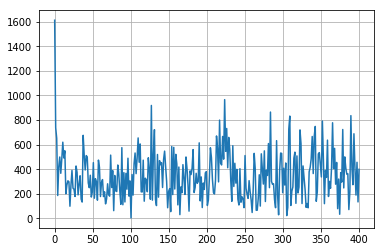

In [59]:
fft = np.fft.fft(df.eegRawValue.values)
from scipy.fftpack import *
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(df.eegRawValue.values)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

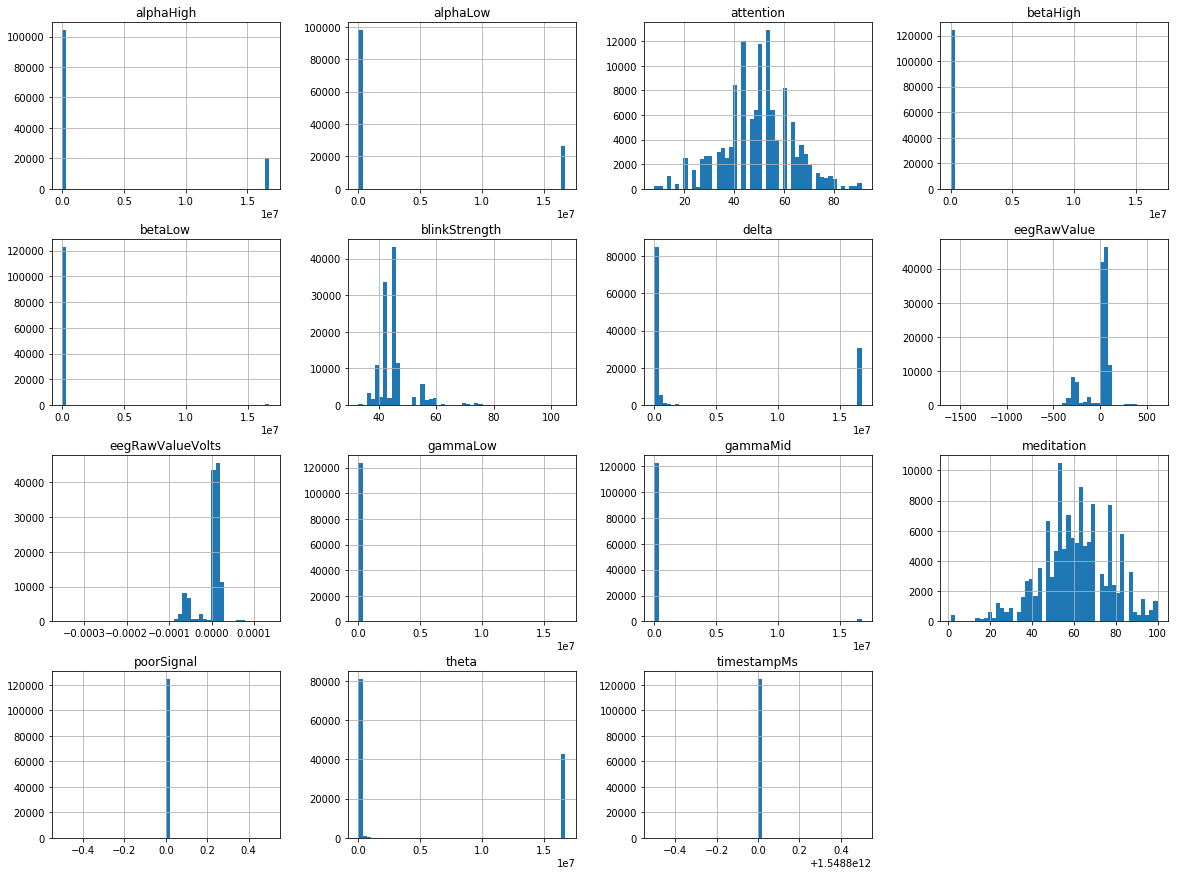

In [60]:
%matplotlib inline 
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15)) 
plt.show()

In [61]:
maths.eegRawValue.max()

618

In [62]:
df.head(100)

,timestampMs,poorSignal,eegRawValue,eegRawValueVolts,attention,meditation,blinkStrength,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid,action
0,1.548800e+12,0,-301,-0.000066,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
1,1.548800e+12,0,-292,-0.000064,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
2,1.548800e+12,0,-293,-0.000064,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
3,1.548800e+12,0,-265,-0.000058,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
4,1.548800e+12,0,-262,-0.000058,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
5,1.548800e+12,0,-282,-0.000062,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
6,1.548800e+12,0,16,0.000004,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
7,1.548800e+12,0,24,0.000005,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
8,1.548800e+12,0,22,0.000005,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math
9,1.548800e+12,0,-291,-0.000064,50,47,59,512361,58621,20511,7636,16390,12020,5592,1360,math


In [63]:
maths.describe()

,timestampMs,poorSignal,eegRawValue,eegRawValueVolts,attention,meditation,blinkStrength,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid
count,6.245600e+04,62456.0,62456.000000,6.245600e+04,62456.000000,62456.000000,62456.000000,6.245600e+04,6.245600e+04,6.245600e+04,6.245600e+04,6.245600e+04,6.245600e+04,6.245600e+04,6.245600e+04
mean,1.548800e+12,0.0,-4.084844,-8.973504e-07,49.242010,58.825509,46.382814,4.223395e+06,4.958593e+06,2.428711e+06,1.448175e+06,2.526843e+05,5.007668e+04,1.781064e+05,5.050518e+05
std,0.000000e+00,0.0,132.170050,2.904045e-05,14.866663,17.890626,7.855360,7.126839e+06,7.613002e+06,5.880638e+06,4.689138e+06,2.003622e+06,8.543196e+05,1.705569e+06,2.861151e+06
min,1.548800e+12,0.0,-635.000000,-1.400000e-04,8.000000,1.000000,33.000000,4.962000e+03,2.331000e+03,3.020000e+02,4.230000e+02,2.160000e+02,3.780000e+02,1.490000e+02,8.500000e+01
25%,1.548800e+12,0.0,9.000000,1.980000e-06,40.000000,48.000000,40.000000,6.737300e+04,1.863000e+04,6.603000e+03,5.451000e+03,4.458000e+03,3.326000e+03,1.221000e+03,8.360000e+02
50%,1.548800e+12,0.0,38.000000,8.350000e-06,50.000000,57.000000,45.000000,1.619190e+05,3.094000e+04,1.527500e+04,1.003600e+04,8.087000e+03,5.760000e+03,2.363000e+03,1.554000e+03
75%,1.548800e+12,0.0,64.000000,1.410000e-05,60.000000,70.000000,47.000000,1.645660e+06,1.674753e+07,2.614200e+04,1.918600e+04,1.241400e+04,8.482000e+03,3.868000e+03,2.478000e+03
max,1.548800e+12,0.0,618.000000,1.360000e-04,91.000000,100.000000,75.000000,1.677582e+07,1.677665e+07,1.677615e+07,1.677106e+07,1.675612e+07,1.675090e+07,1.677721e+07,1.677721e+07


In [64]:
len(maths)

62456

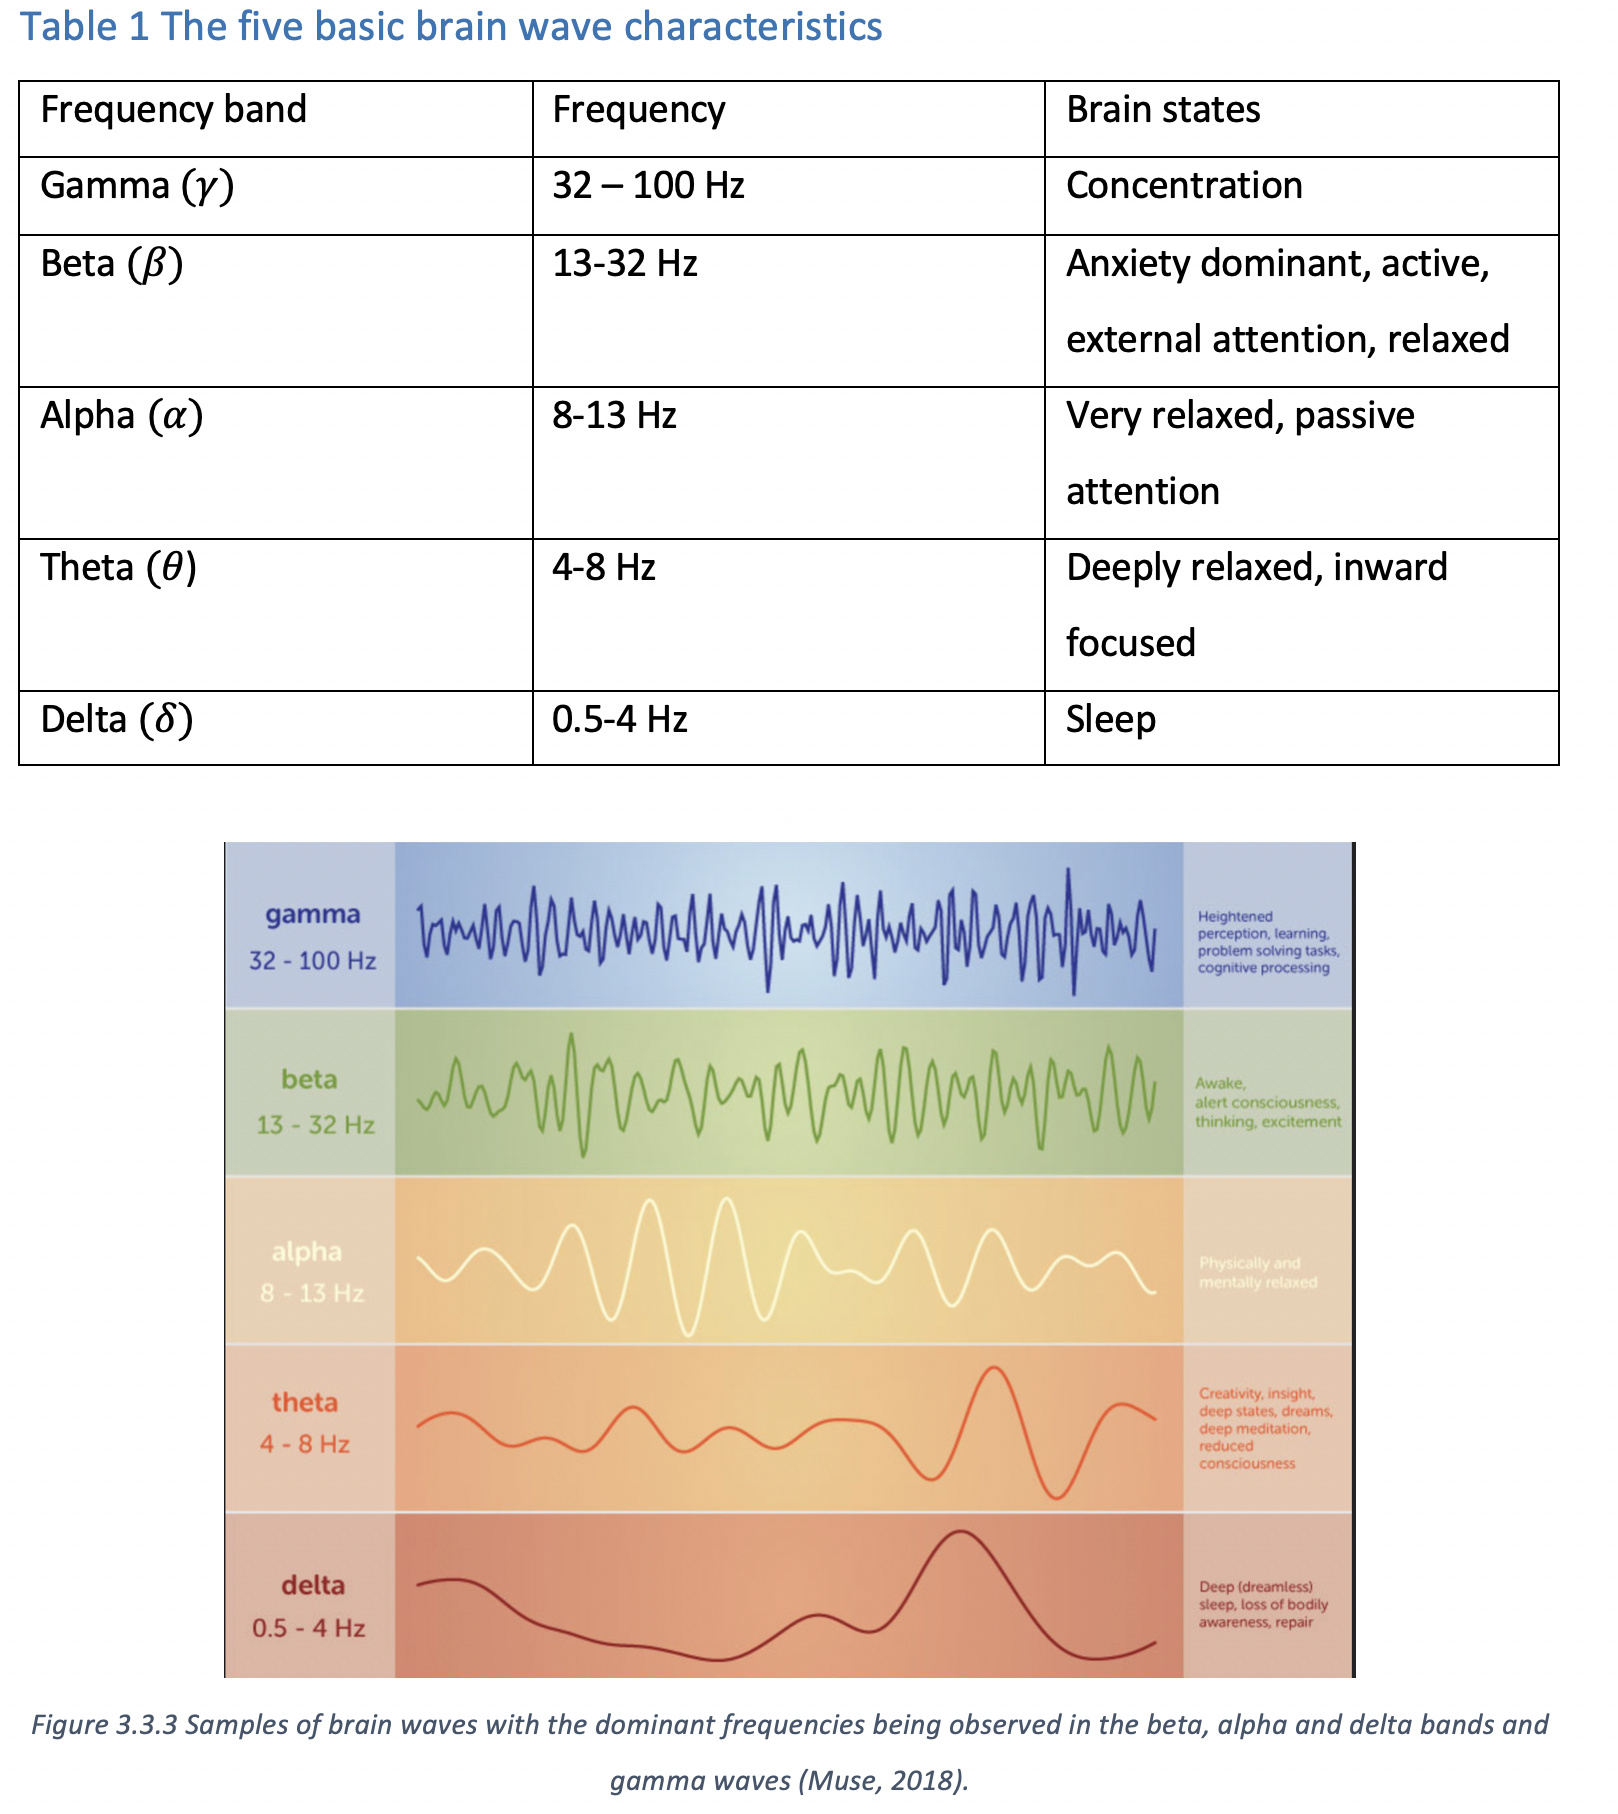

## Mean comparison of waves while resting and performing math equations

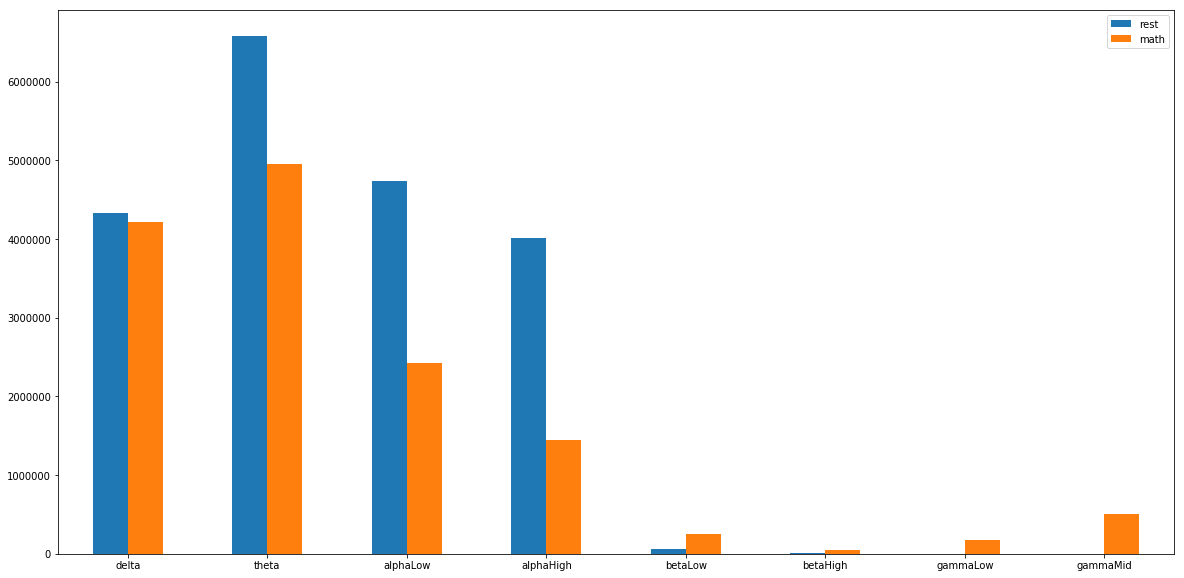

In [65]:
r = [rest.delta.mean(), rest.theta.mean(), rest.alphaLow.mean(), 
     rest.alphaHigh.mean(), rest.betaLow.mean(), rest.betaHigh.mean(), 
     rest.gammaLow.mean(), rest.gammaMid.mean()]

m = [maths.delta.mean(), maths.theta.mean(), maths.alphaLow.mean(), 
     maths.alphaHigh.mean(), maths.betaLow.mean(), maths.betaHigh.mean(), 
     maths.gammaLow.mean(), maths.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

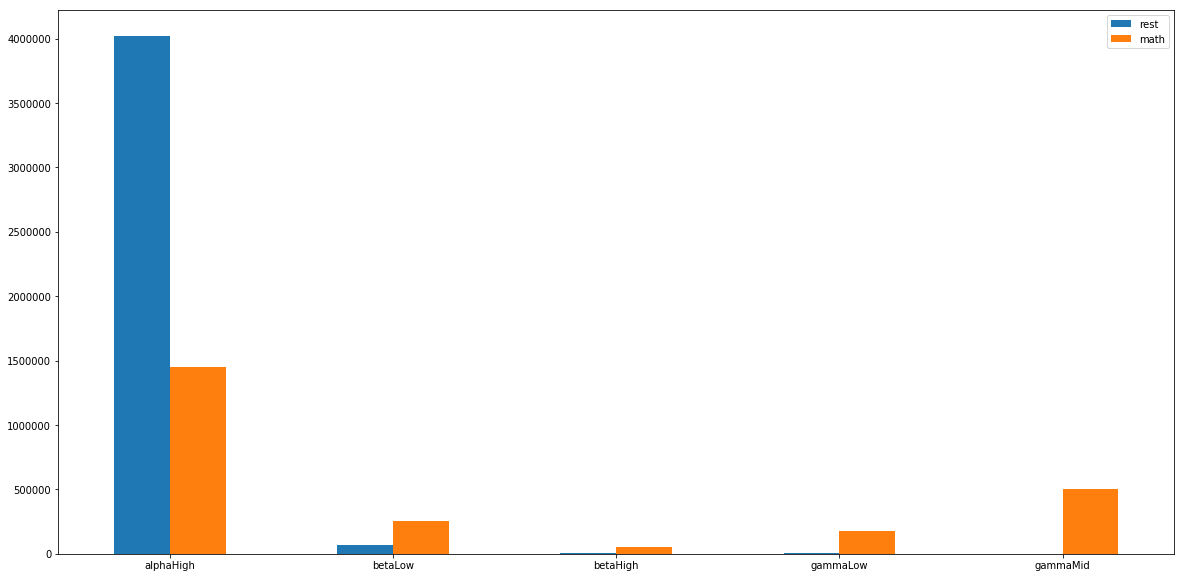

In [66]:
r = [rest.alphaHigh.mean(), rest.betaLow.mean(), rest.betaHigh.mean(), 
     rest.gammaLow.mean(), rest.gammaMid.mean()]

m = [maths.alphaHigh.mean(), maths.betaLow.mean(), maths.betaHigh.mean(), 
     maths.gammaLow.mean(), maths.gammaMid.mean()]


index = ['alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

## Standard Deviation comparison of waves while resting and performing math equations

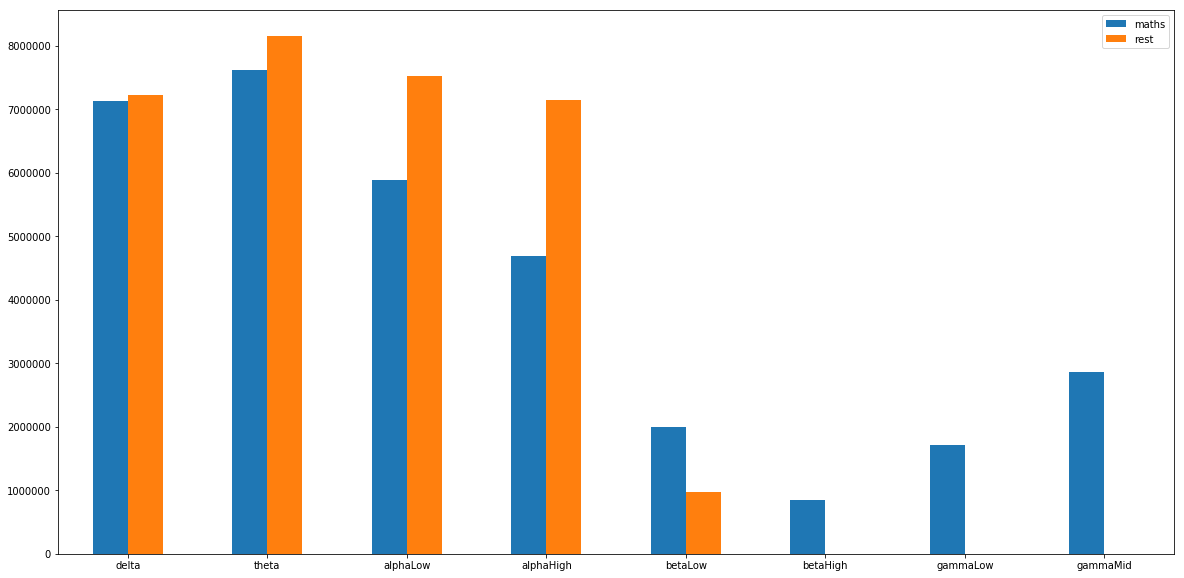

In [67]:
r = [rest.delta.std(), rest.theta.std(), rest.alphaLow.std(), 
     rest.alphaHigh.std(), rest.betaLow.std(), rest.betaHigh.std(), 
     rest.gammaLow.std(), rest.gammaMid.std()]

m = [maths.delta.std(), maths.theta.std(), maths.alphaLow.std(), 
     maths.alphaHigh.std(), maths.betaLow.std(), maths.betaHigh.std(), 
     maths.gammaLow.std(), maths.gammaMid.std()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'maths': m,'rest': r}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

## Standard Deviation + Mean comparison of waves while resting and performing math equations 

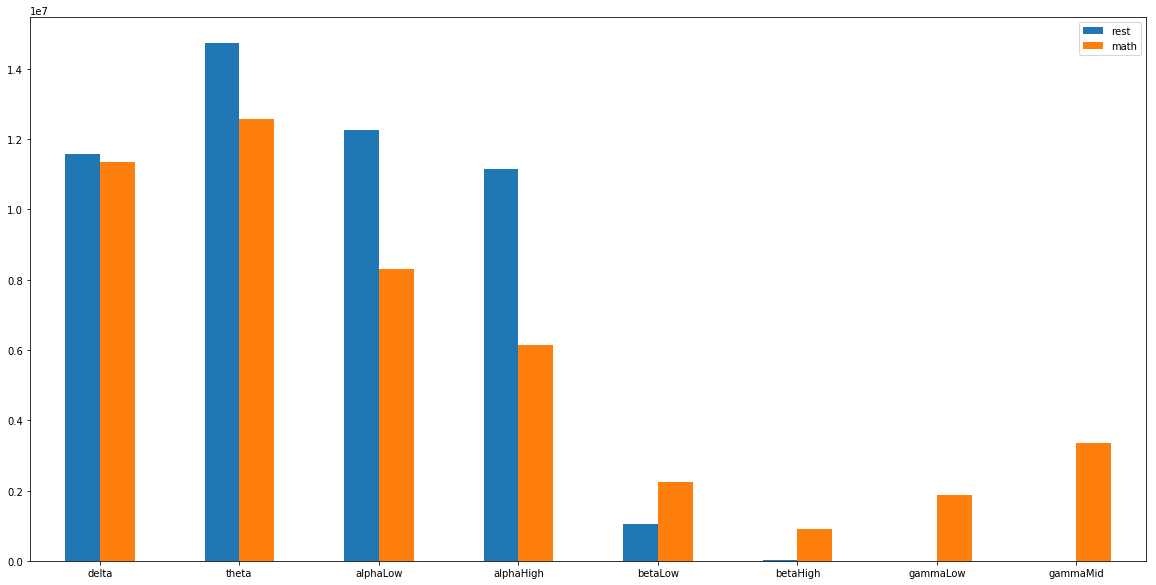

In [68]:
r = [rest.delta.std()+rest.delta.mean(), rest.theta.std()+rest.theta.mean(),
     rest.alphaLow.std()+rest.alphaLow.mean(), 
     rest.alphaHigh.std()+rest.alphaHigh.mean(), rest.betaLow.std()+rest.betaLow.mean(), 
     rest.betaHigh.std()+rest.betaHigh.mean(), 
     rest.gammaLow.std()+rest.gammaLow.mean(), rest.gammaMid.std()+rest.gammaMid.std()]

m = [maths.delta.std()+maths.delta.mean(), maths.theta.std()+maths.theta.mean(), 
     maths.alphaLow.std()+maths.alphaLow.mean(), 
     maths.alphaHigh.std()+maths.alphaHigh.mean(), maths.betaLow.std()+maths.betaLow.mean(), 
     maths.betaHigh.std()+maths.betaHigh.mean(), 
     maths.gammaLow.std()+maths.gammaLow.mean(), maths.gammaMid.std()+maths.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

## Standard Deviation + Mean comparison of waves while resting and performing math equations¶

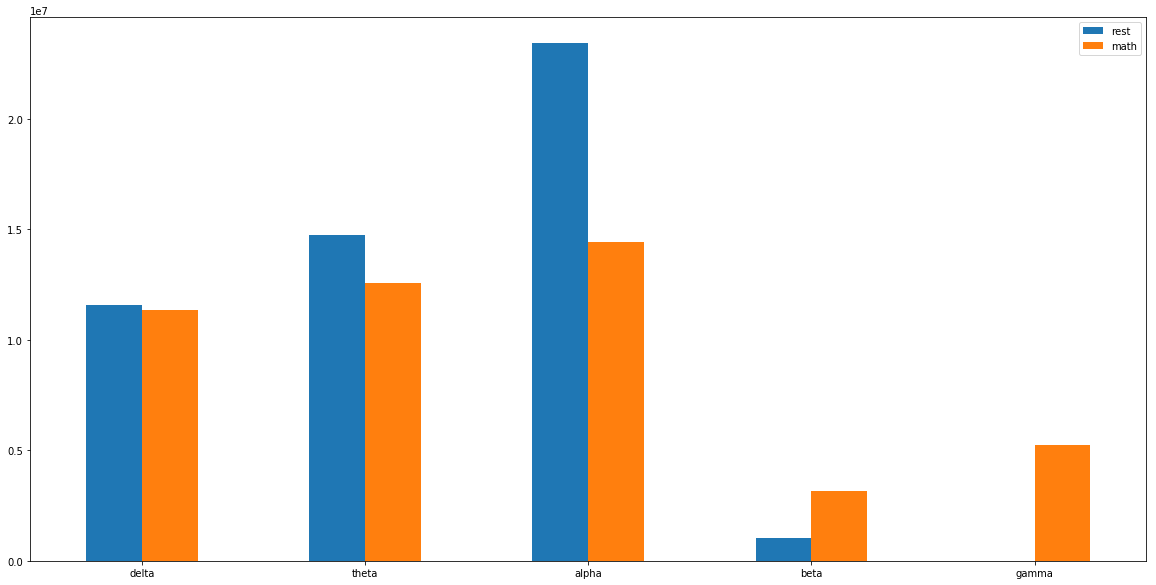

In [69]:
r = [rest.delta.std()+rest.delta.mean(), rest.theta.std()+rest.theta.mean(),
     (rest.alphaLow.std()+rest.alphaLow.mean()+ 
     rest.alphaHigh.std()+rest.alphaHigh.mean()), (rest.betaLow.std()+rest.betaLow.mean()+ 
     rest.betaHigh.std()+rest.betaHigh.mean()), 
     (rest.gammaLow.std()+rest.gammaLow.mean()+rest.gammaMid.std()+rest.gammaMid.std())]

m = [maths.delta.std()+maths.delta.mean(), maths.theta.std()+maths.theta.mean(), 
     (maths.alphaLow.std()+maths.alphaLow.mean()+ 
     maths.alphaHigh.std()+maths.alphaHigh.mean()), (maths.betaLow.std()+maths.betaLow.mean()+ 
     maths.betaHigh.std()+maths.betaHigh.mean()), 
     (maths.gammaLow.std()+maths.gammaLow.mean()+maths.gammaMid.std()+maths.gammaMid.mean())]


index = ['delta', 'theta', 'alpha', 'beta', 'gamma']

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

## Mean comparison of waves while resting and performing math equations

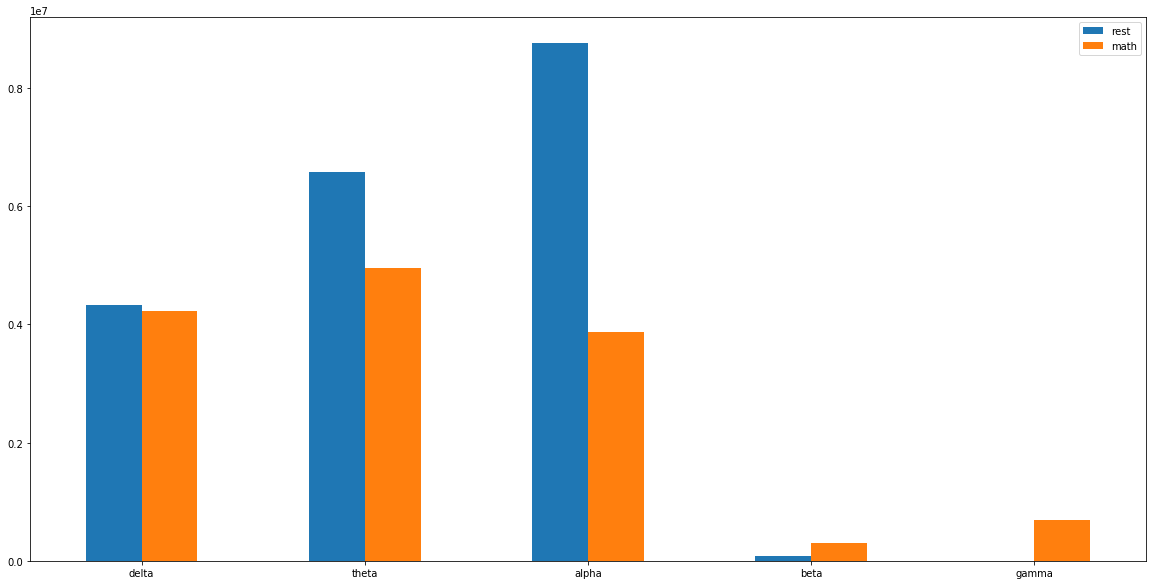

In [70]:
r = [rest.delta.mean(), rest.theta.mean(),
     (rest.alphaLow.mean()+ 
     rest.alphaHigh.mean()), (rest.betaLow.mean()+ 
     rest.betaHigh.mean()), 
     (rest.gammaLow.mean()+rest.gammaMid.mean())]

m = [maths.delta.mean(), maths.theta.mean(), 
     (maths.alphaLow.mean()+ 
     maths.alphaHigh.mean()), (maths.betaLow.mean()+ 
     maths.betaHigh.mean()), 
     (maths.gammaLow.mean()+maths.gammaMid.mean())]


index = ['delta', 'theta', 'alpha', 'beta', 'gamma']

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

## Standard Deviation comparison of waves while resting and performing math equations

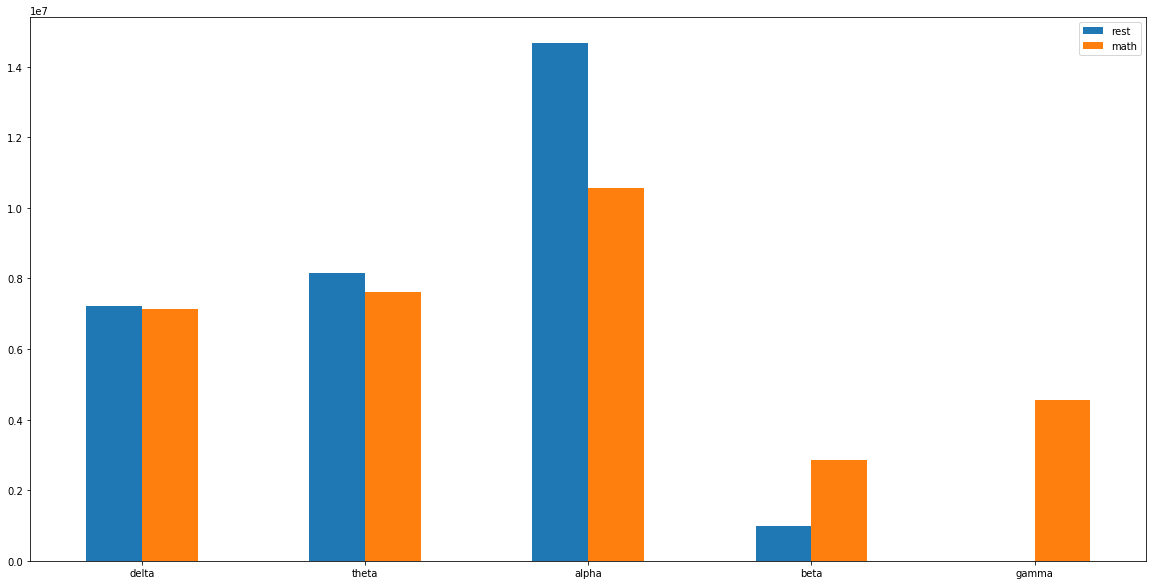

In [71]:
r = [rest.delta.std(), rest.theta.std(),
     (rest.alphaLow.std()+ 
     rest.alphaHigh.std()), (rest.betaLow.std()+ 
     rest.betaHigh.std()), 
     (rest.gammaLow.std()+rest.gammaMid.std())]

m = [maths.delta.std(), maths.theta.std(), 
     (maths.alphaLow.std()+ 
     maths.alphaHigh.std()), (maths.betaLow.std()+ 
     maths.betaHigh.std()), 
     (maths.gammaLow.std()+maths.gammaMid.std())]


index = ['delta', 'theta', 'alpha', 'beta', 'gamma']

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

## rest data correlations 

In [76]:
from pandas import set_option

corr = rest.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)

set_option('display.width', 100)
set_option('precision', 3)
correlations = corr.corr(method='pearson')
correlations = correlations
correlations

,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid
delta,1.000,0.022,0.049,-0.013,-0.034,-0.049,-0.061,-0.098
theta,0.022,1.000,-0.072,-0.006,0.073,-0.064,-0.055,-0.025
alphaLow,0.049,-0.072,1.000,0.022,-0.036,0.102,0.054,0.008
alphaHigh,-0.013,-0.006,0.022,1.000,-0.032,-0.003,0.015,0.050
betaLow,-0.034,0.073,-0.036,-0.032,1.000,0.023,0.055,-0.034
betaHigh,-0.049,-0.064,0.102,-0.003,0.023,1.000,0.147,0.163
gammaLow,-0.061,-0.055,0.054,0.015,0.055,0.147,1.000,0.538
gammaMid,-0.098,-0.025,0.008,0.050,-0.034,0.163,0.538,1.000


## math data correlations 

In [77]:
from pandas import set_option

corr = maths.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)

set_option('display.width', 100)
set_option('precision', 3)
correlations = corr.corr(method='pearson')
correlations

,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid
delta,1.000,-0.085,0.029,-0.090,0.004,-0.027,-0.059,0.029
theta,-0.085,1.000,-0.059,0.059,-0.011,-0.028,-0.064,-0.114
alphaLow,0.029,-0.059,1.000,0.119,0.128,0.125,0.031,-0.072
alphaHigh,-0.090,0.059,0.119,1.000,-0.036,-0.015,-0.031,-0.054
betaLow,0.004,-0.011,0.128,-0.036,1.000,-0.003,-0.012,-0.022
betaHigh,-0.027,-0.028,0.125,-0.015,-0.003,1.000,0.497,-0.010
gammaLow,-0.059,-0.064,0.031,-0.031,-0.012,0.497,1.000,-0.018
gammaMid,0.029,-0.114,-0.072,-0.054,-0.022,-0.010,-0.018,1.000


In [74]:
from pandas import set_option

delta_beta = pd.DataFrame([maths.delta, maths.betaLow])

set_option('display.width', 100)
set_option('precision', 3)
correlations = delta_beta.corr(method='pearson')
print(correlations)

       0      1      2      3      4      5      6      7      8      9      ...    62446  62447  \
0        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   
1        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   
2        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   
3        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   
4        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   
5        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   
6        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   
7        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   
8        1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...     -1.0   -1.0   


## Skew of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. 
Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame. 
The skew results show a positive (right) or negative (left) skew. Values closer to zero show less skew.

In [78]:
correlations.skew()

delta        2.735
theta        2.720
alphaLow     2.535
alphaHigh    2.648
betaLow      2.719
betaHigh     1.884
gammaLow     1.903
gammaMid     2.750
dtype: float64

## Density Plots

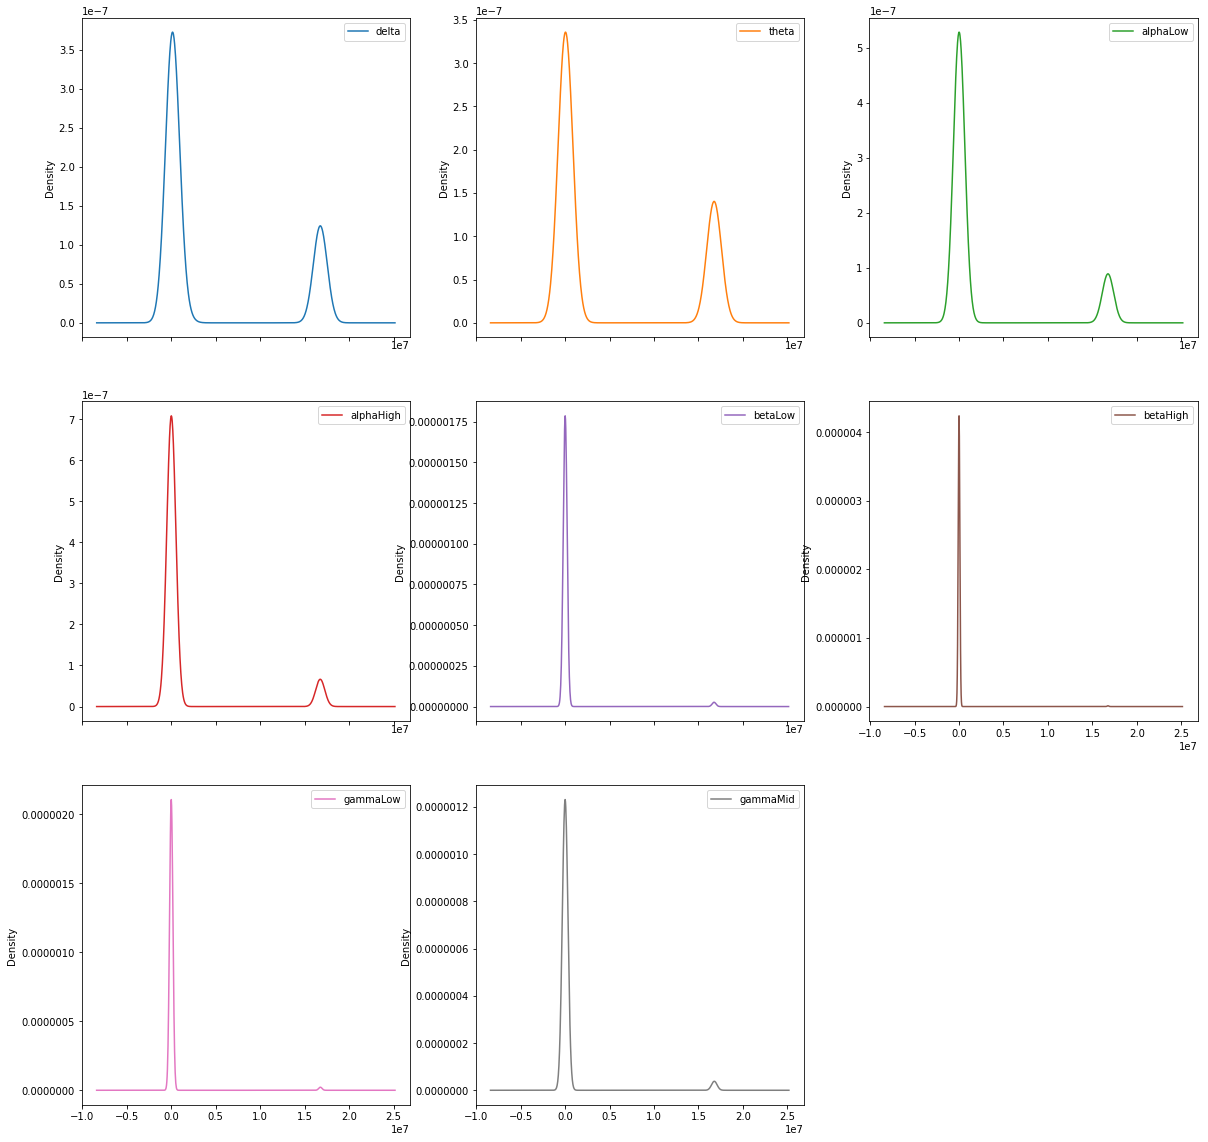

In [91]:
df = maths.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)

df.plot(kind='density', subplots=True, figsize=(20,20), layout=(3, 3)) 
plt.show()

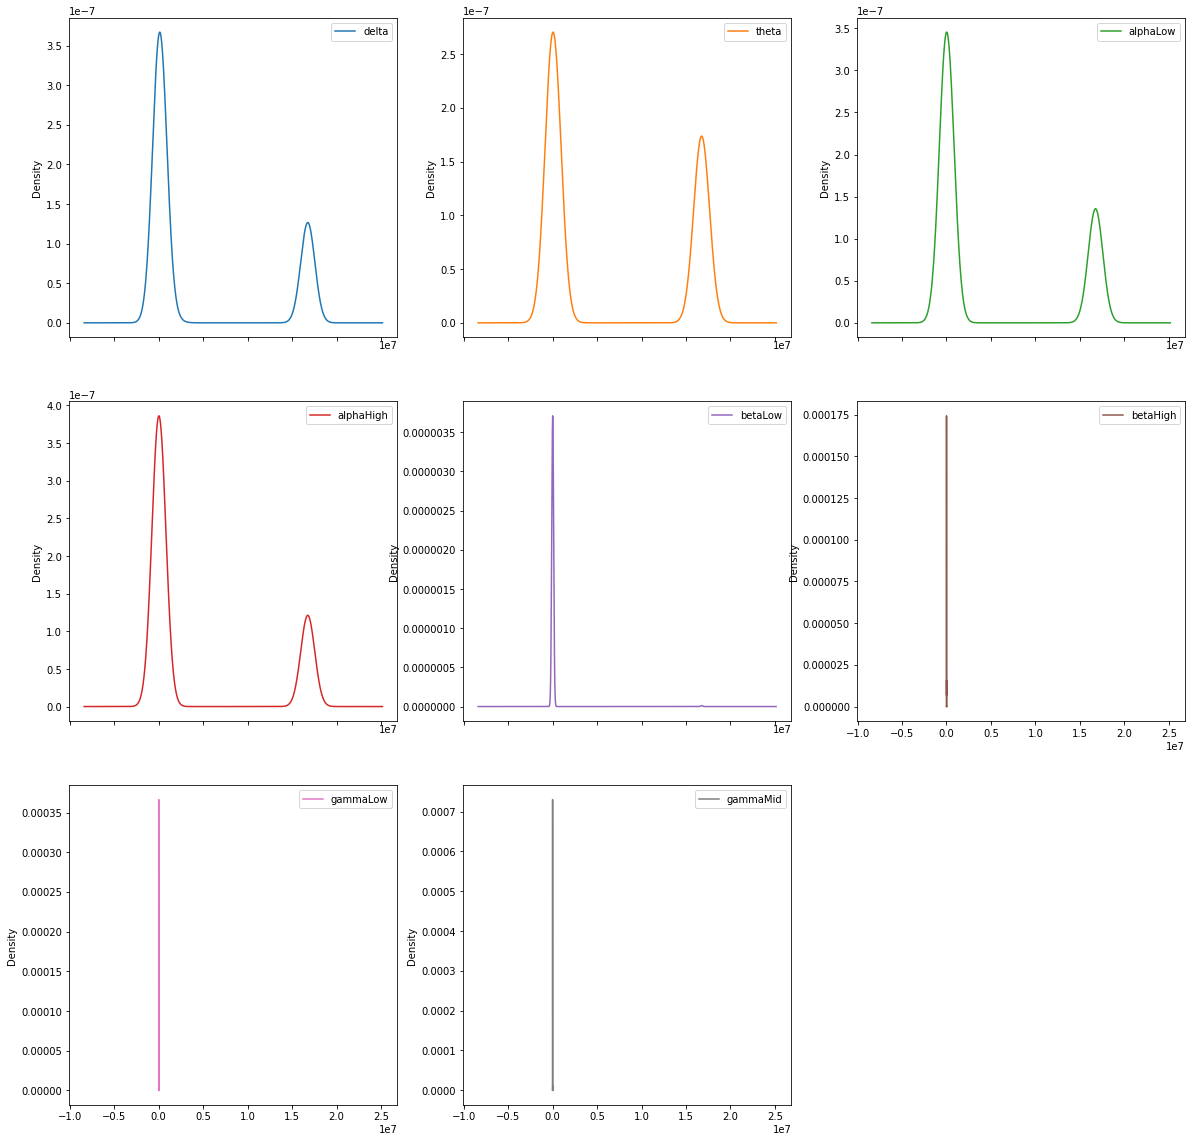

In [90]:
df = rest.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)

df.plot(kind='density', subplots=True, figsize=(20,20), layout=(3, 3)) 
plt.show()

### Box and Whisker Plots

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).
<br>
We can see that the spread of attributes is quite different. Some like age, test and skin
appear quite skewed towards smaller values.

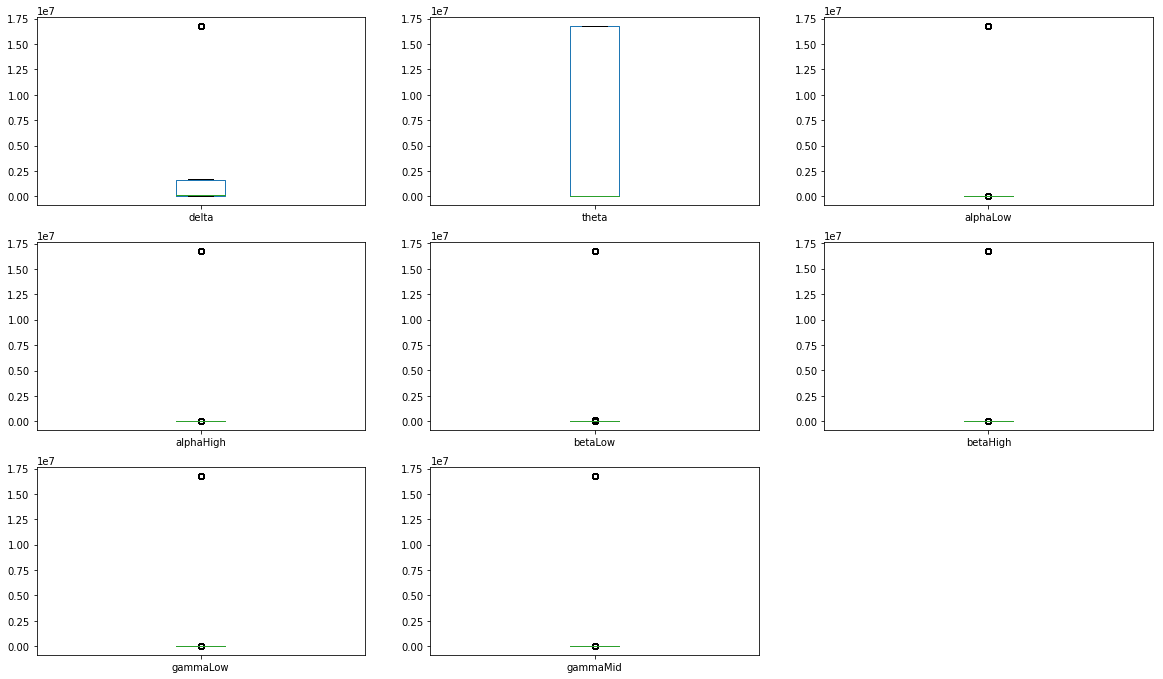

In [97]:
df.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(20,20)) 
plt.show()

### Correlation Matrix Plot

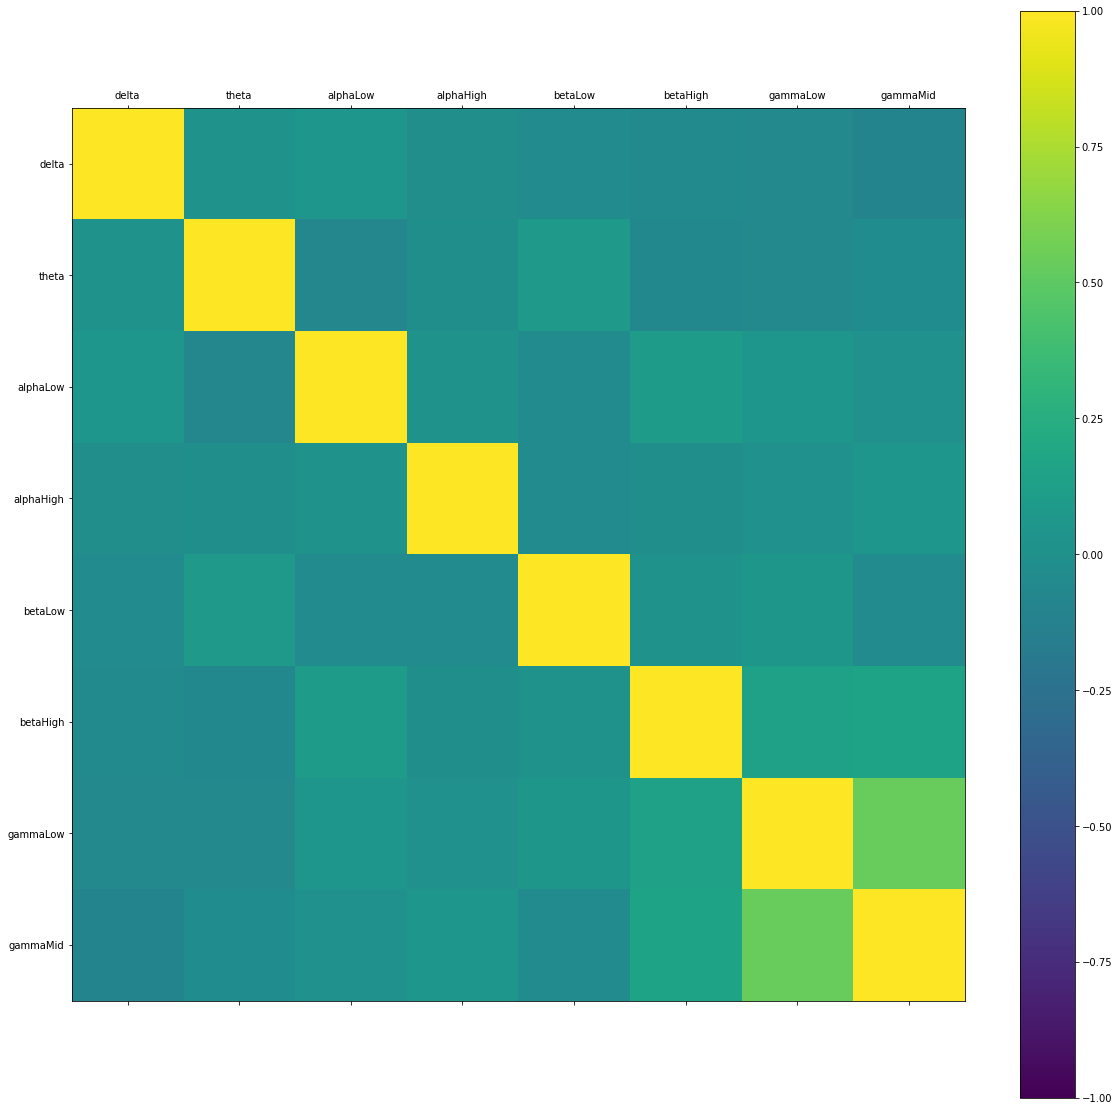

In [109]:

from pandas import set_option

corr = rest.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)

set_option('display.width', 100)
set_option('precision', 3)
correlations = corr.corr(method='pearson')
correlations = correlations
correlations

df = rest.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength', 'action'], axis=1)
# plot correlation matrix
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

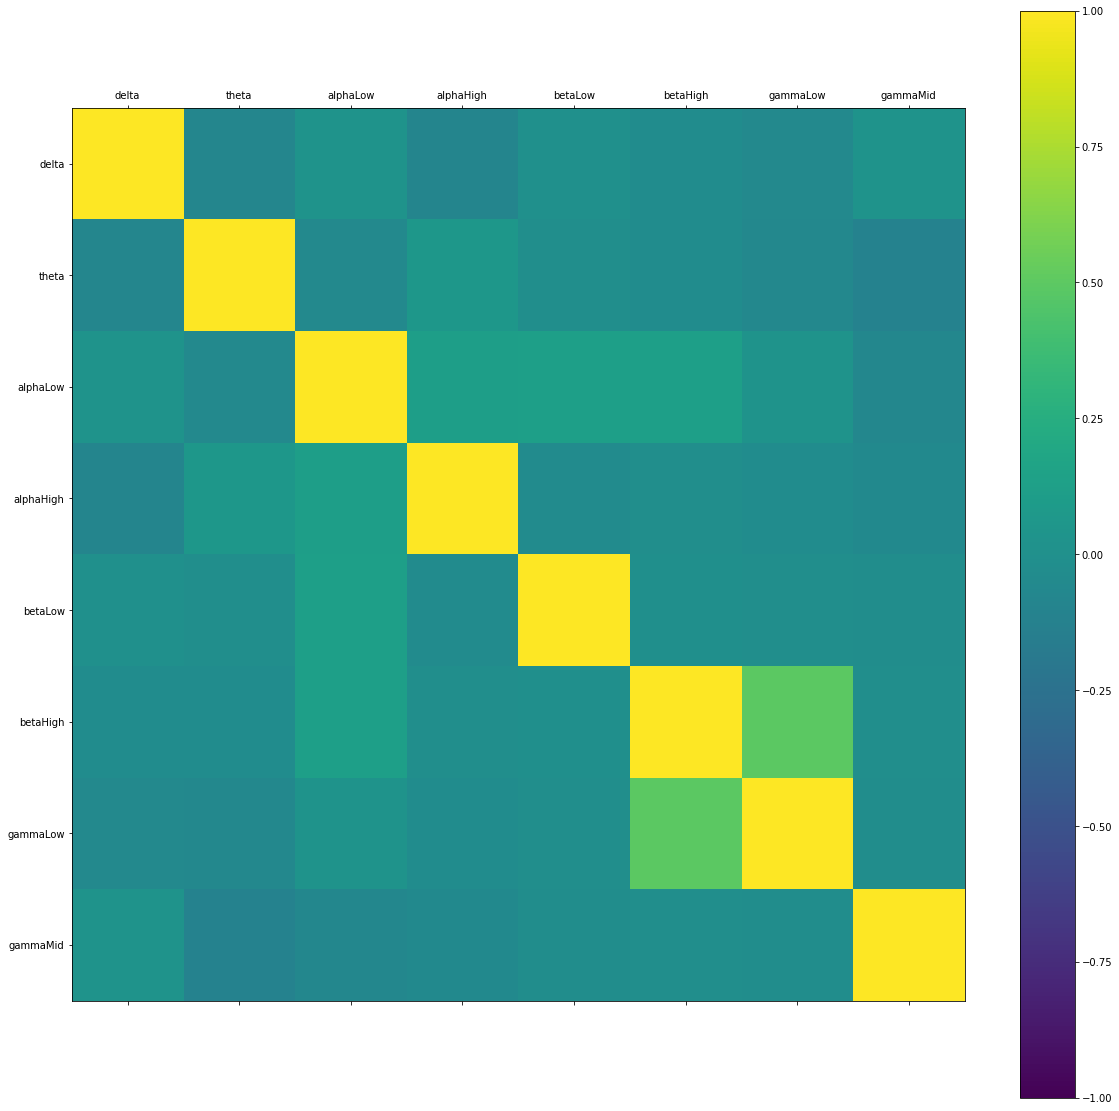

In [95]:

df = maths.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength', 'action'], axis=1)
# plot correlation matrix
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

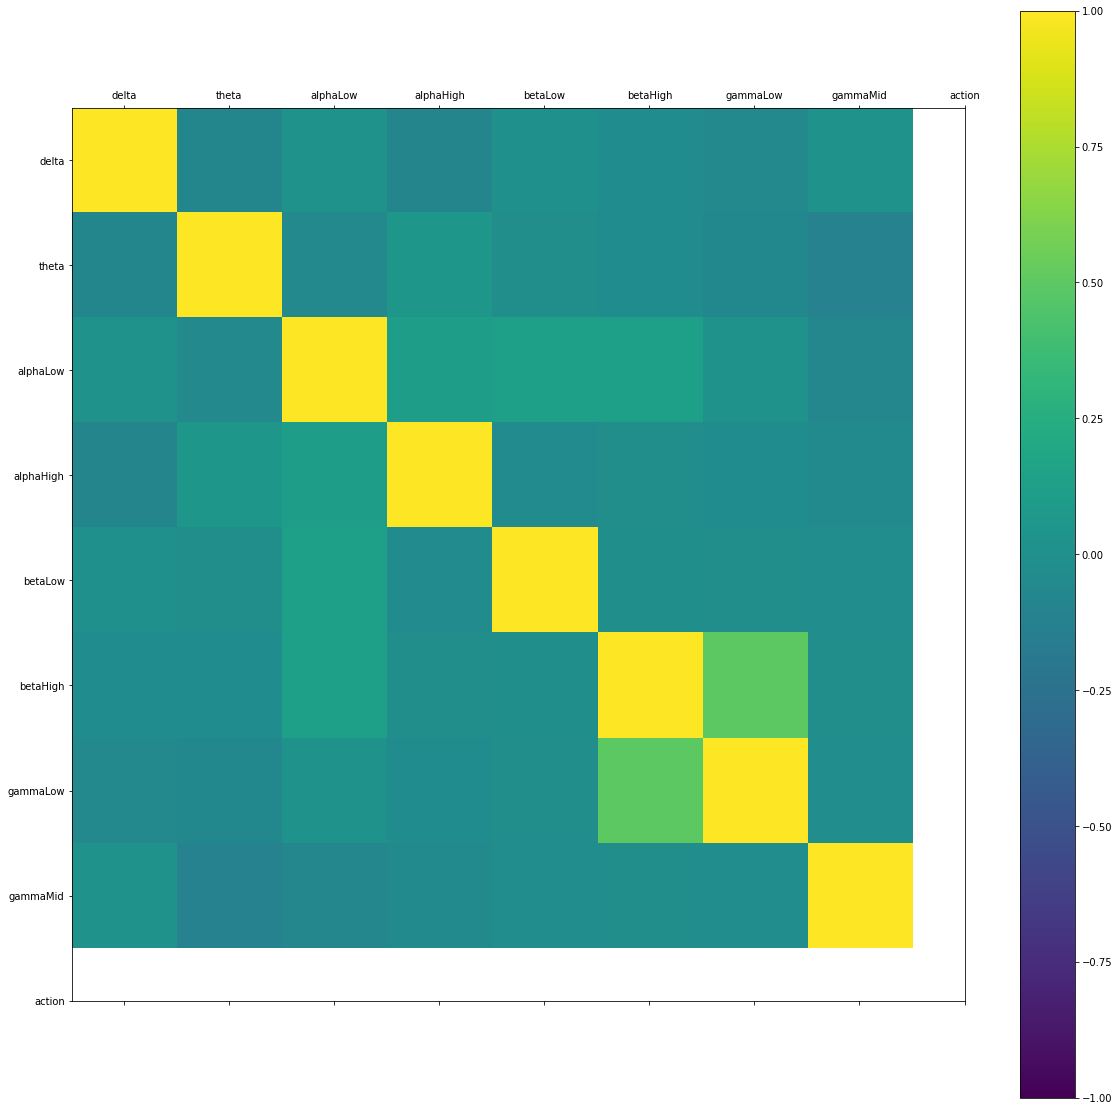

In [86]:

df = rest.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)
# plot correlation matrix
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

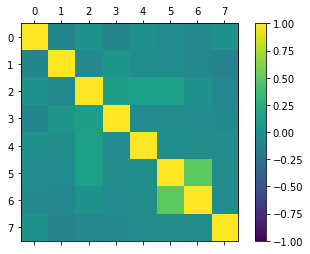

In [42]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

### Scatter Plot Matrix

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.


Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. This is useful to look at the pairwise relationships from different perspectives. Because there is little point of drawing a scatter plot of each variable with itself, the diagonal shows histograms of each attribute.

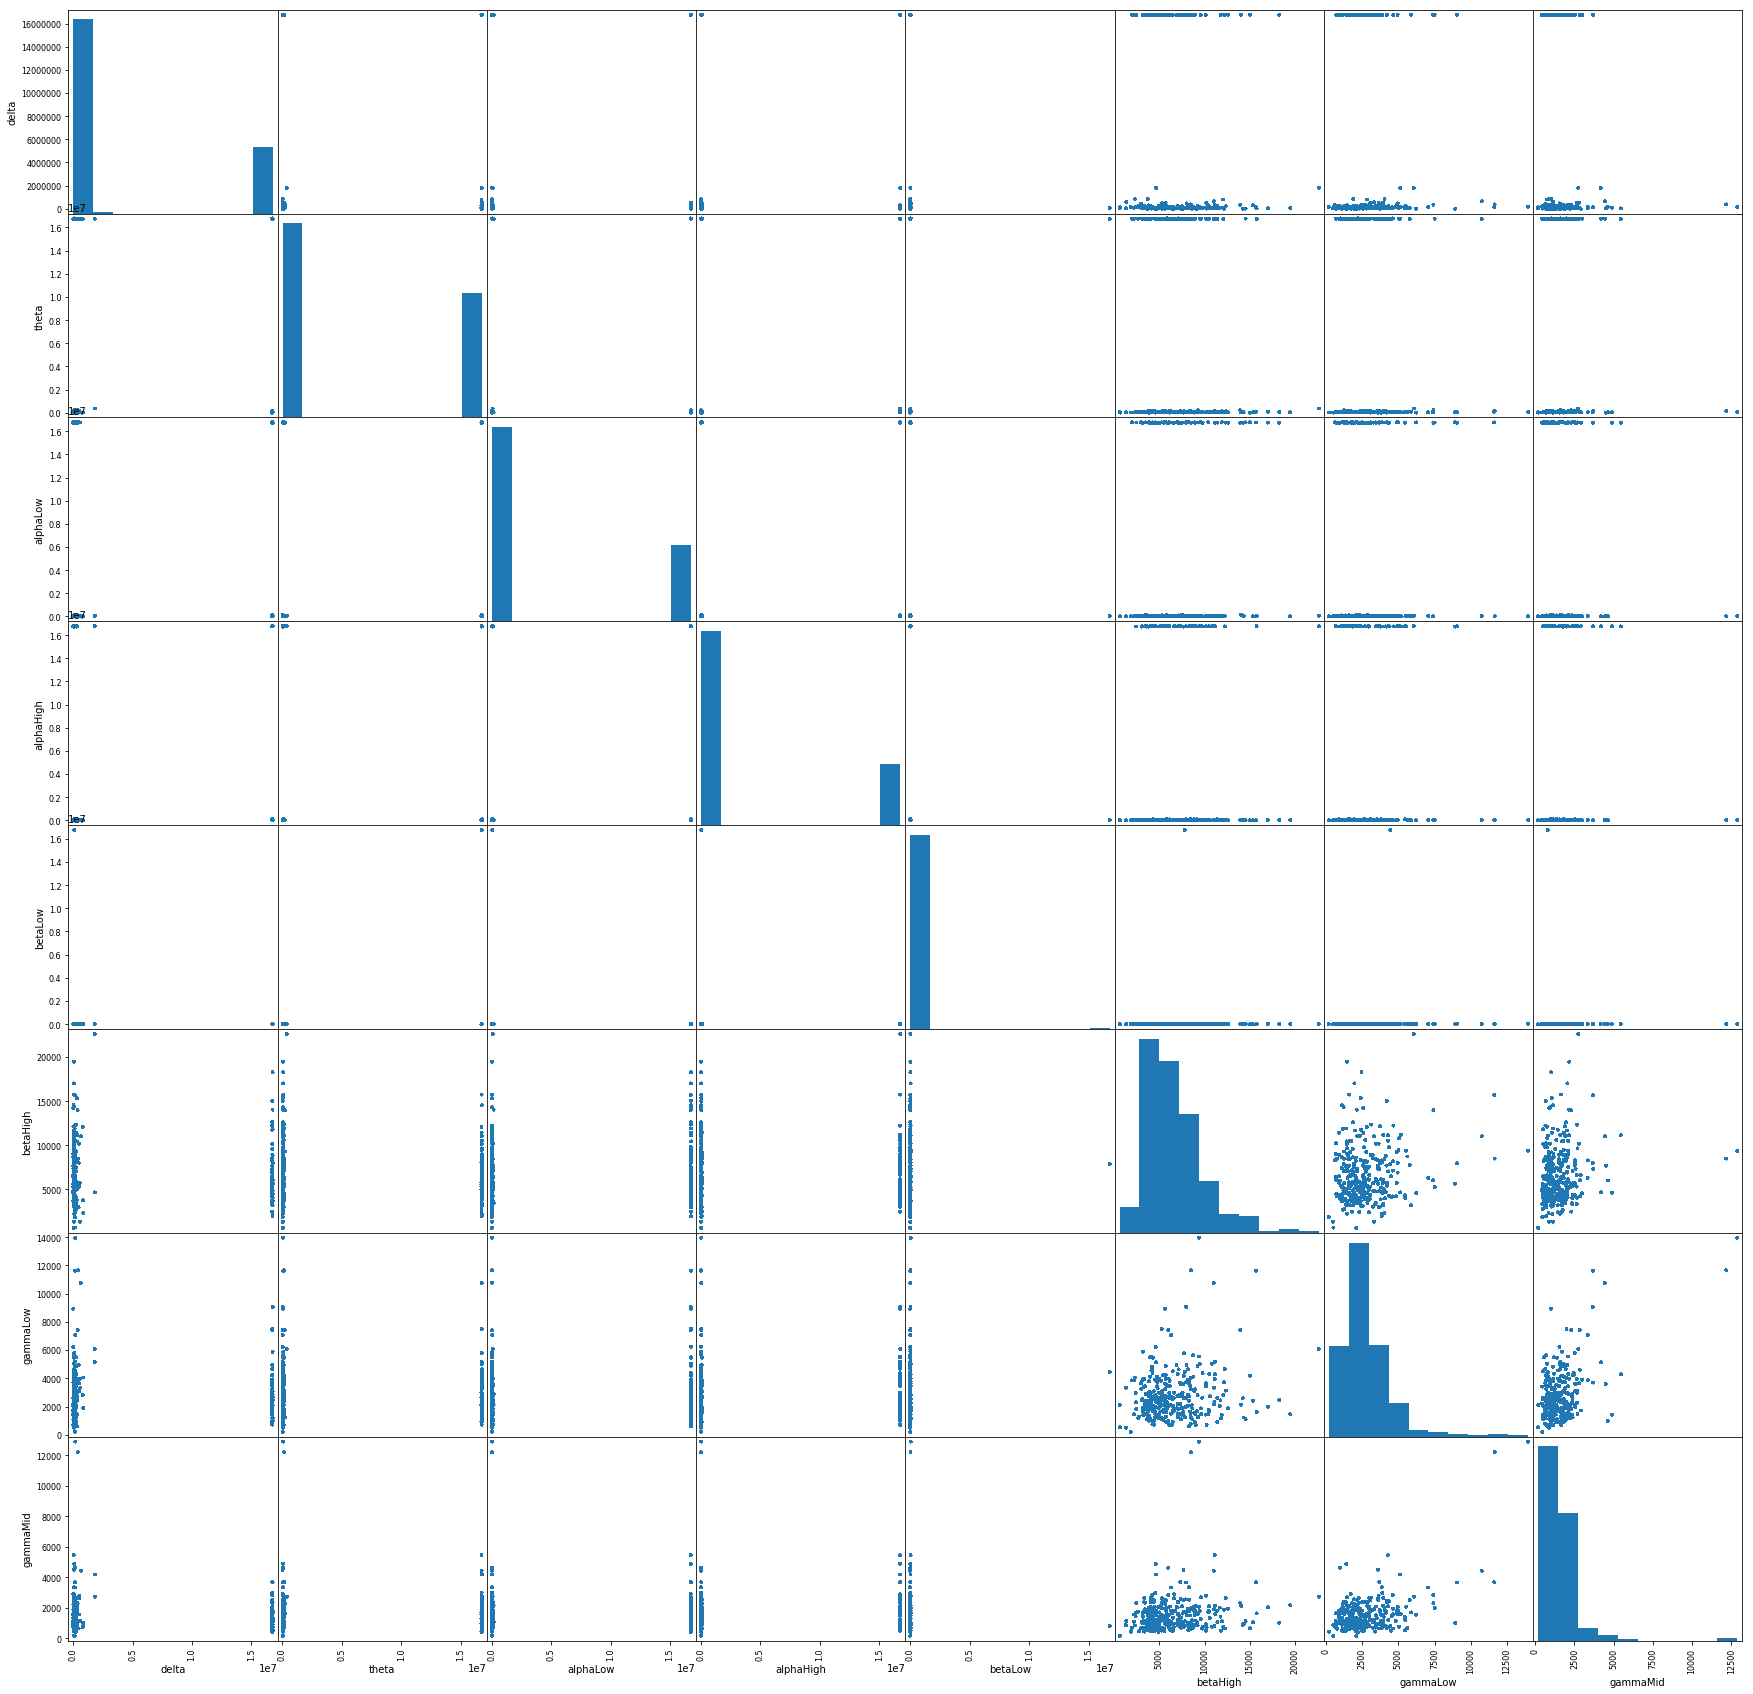

In [101]:
from pandas.plotting import scatter_matrix
rest_waves = rest.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)
scatter_matrix(rest_waves, figsize=(30, 30))
plt.show()

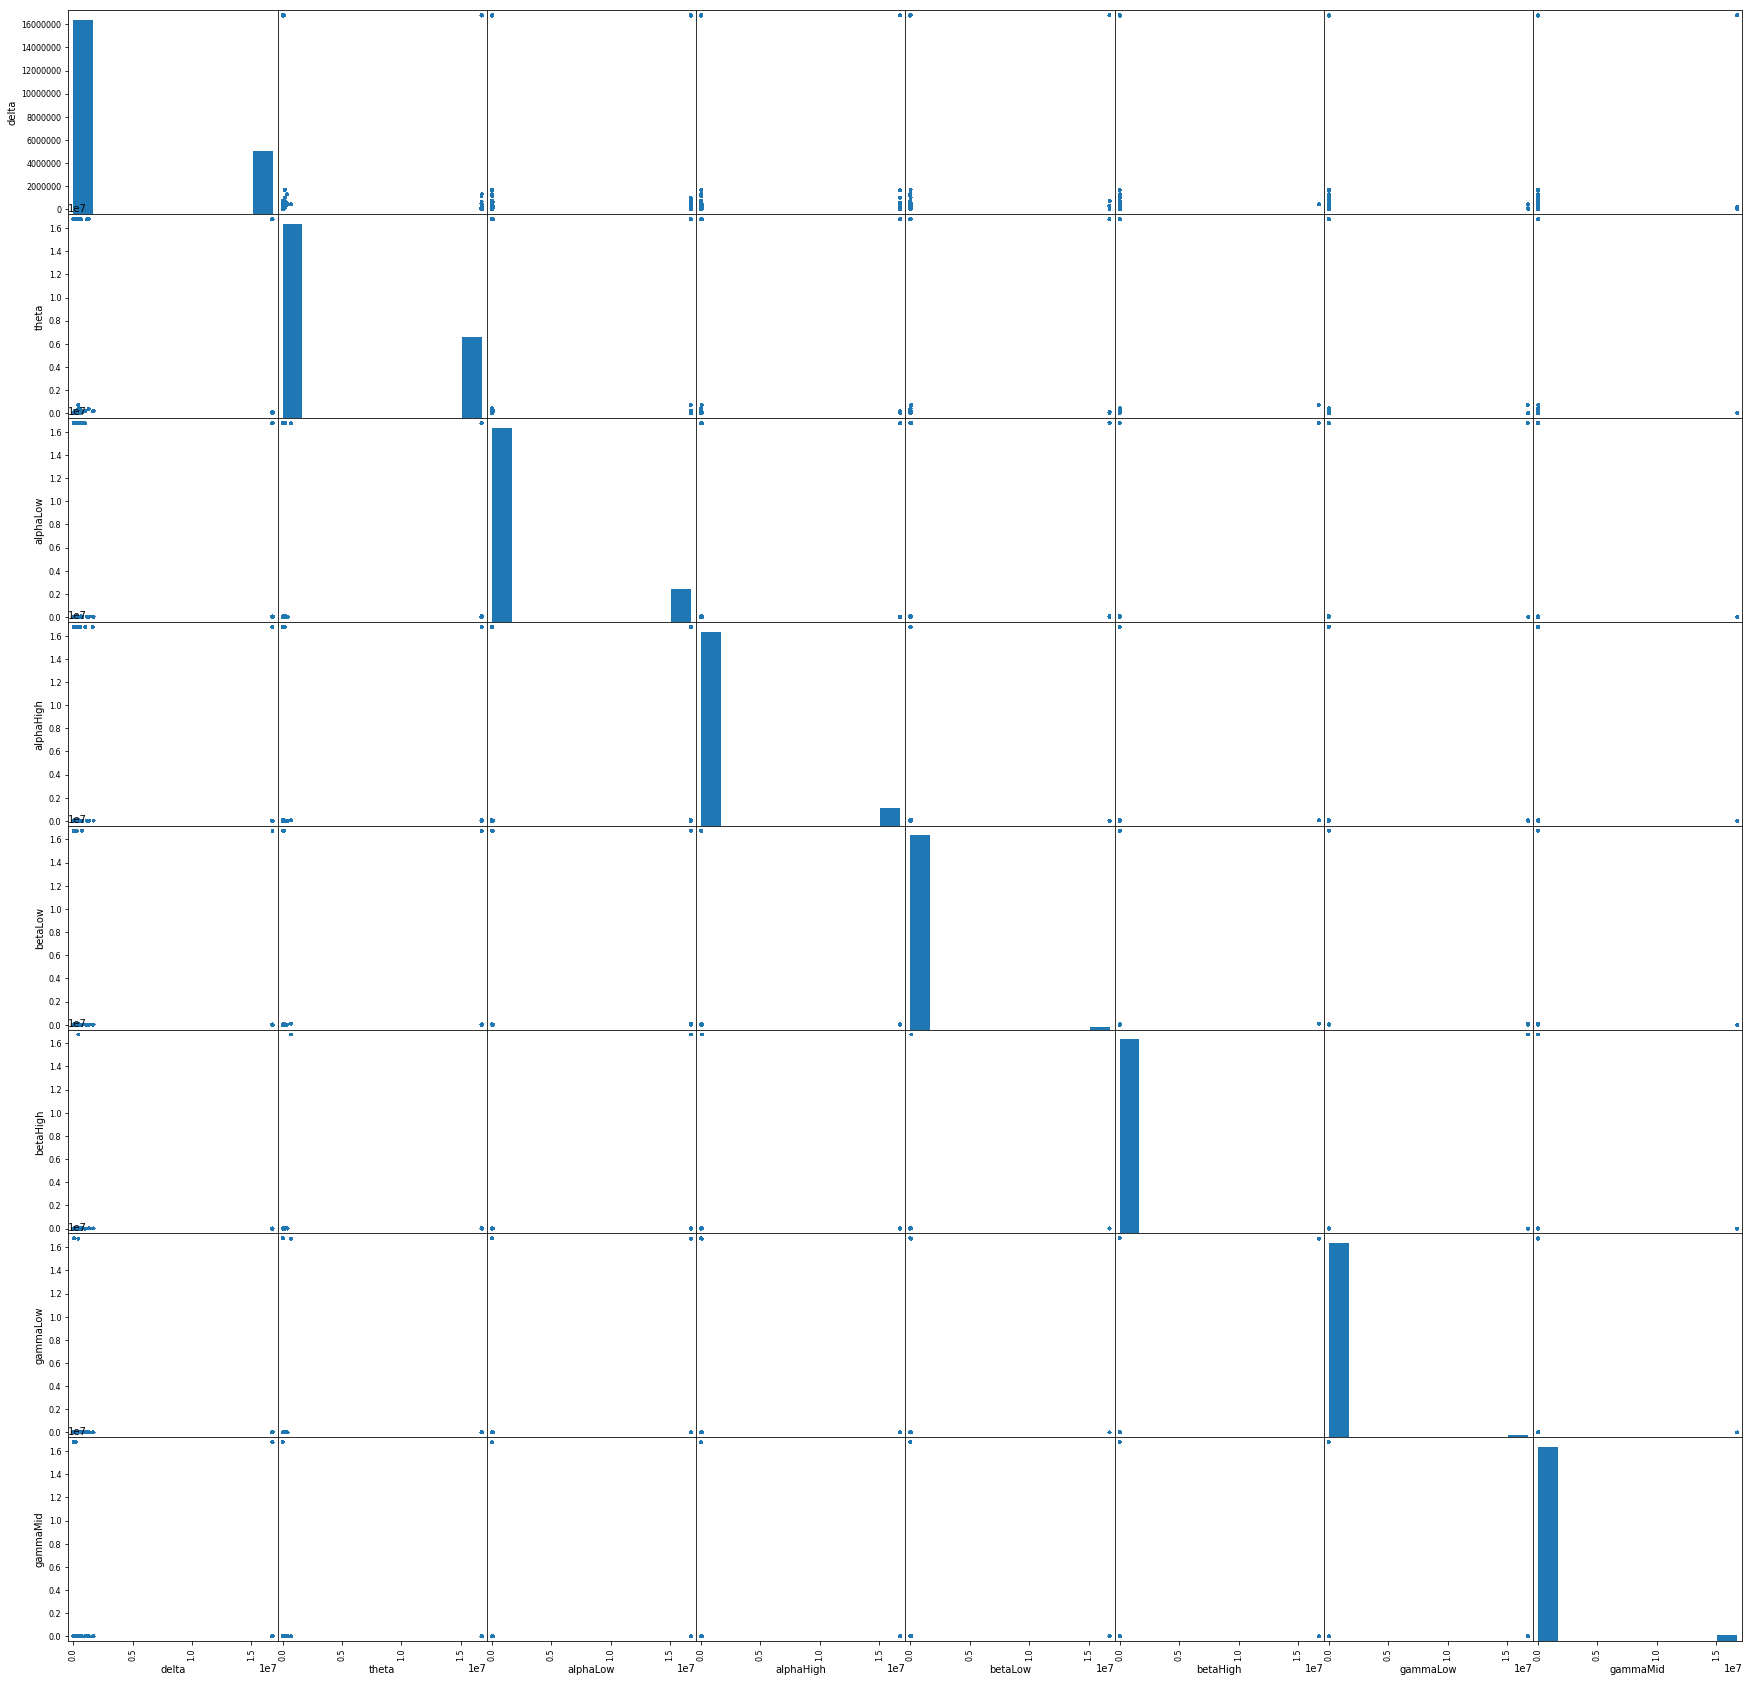

In [98]:
from pandas.plotting import scatter_matrix
maths_waves = maths.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)
scatter_matrix(maths_waves, figsize=(30, 30))
plt.show()

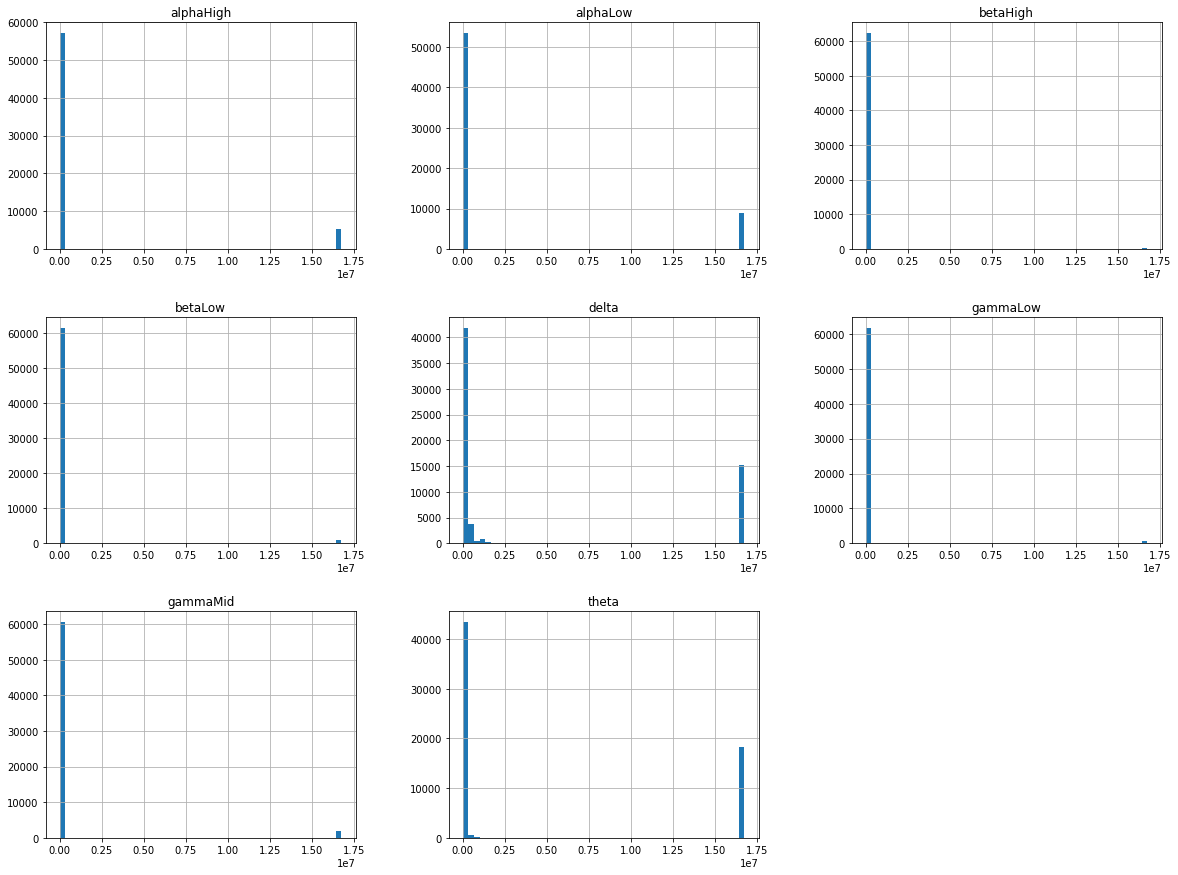

In [99]:
math_waves = maths.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)

math_waves.hist(bins=50, figsize=(20,15)) 
plt.show()

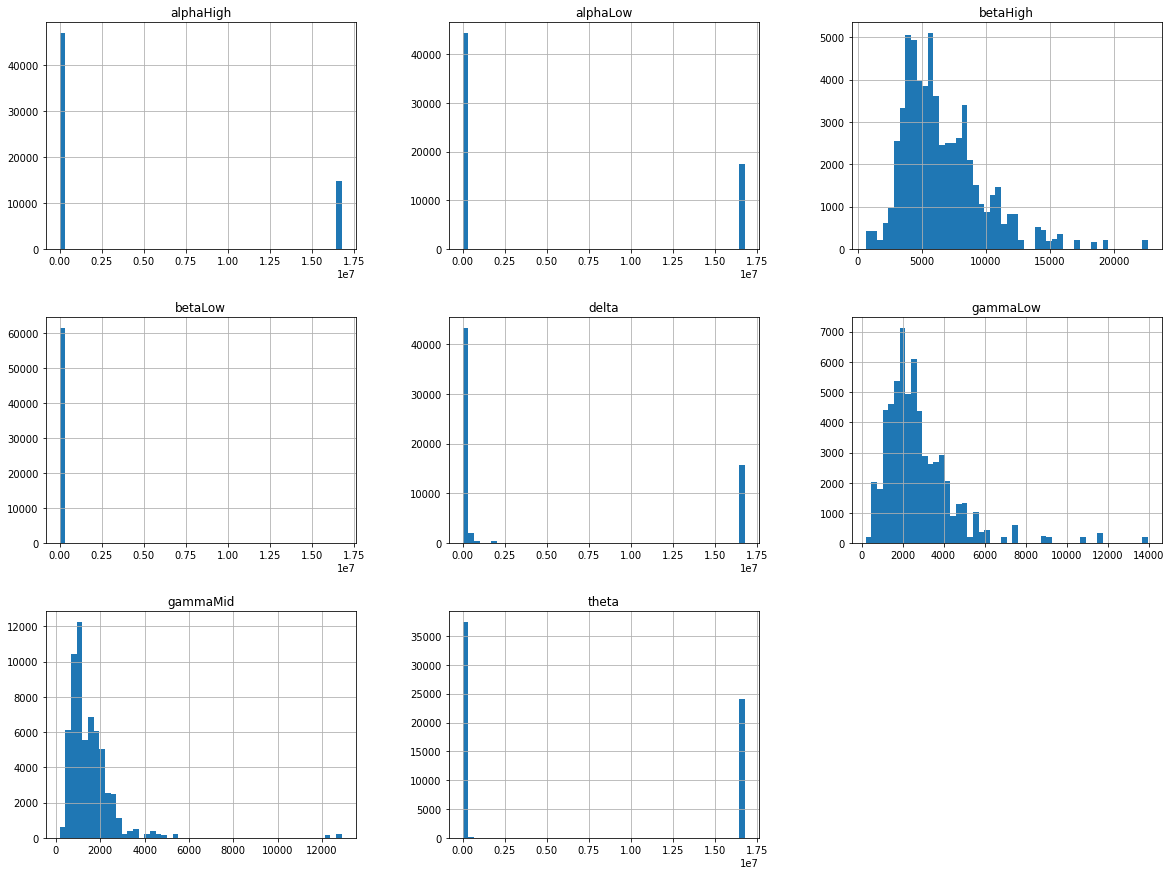

In [102]:


rest_waves.hist(bins=50, figsize=(20,15)) 
plt.show()

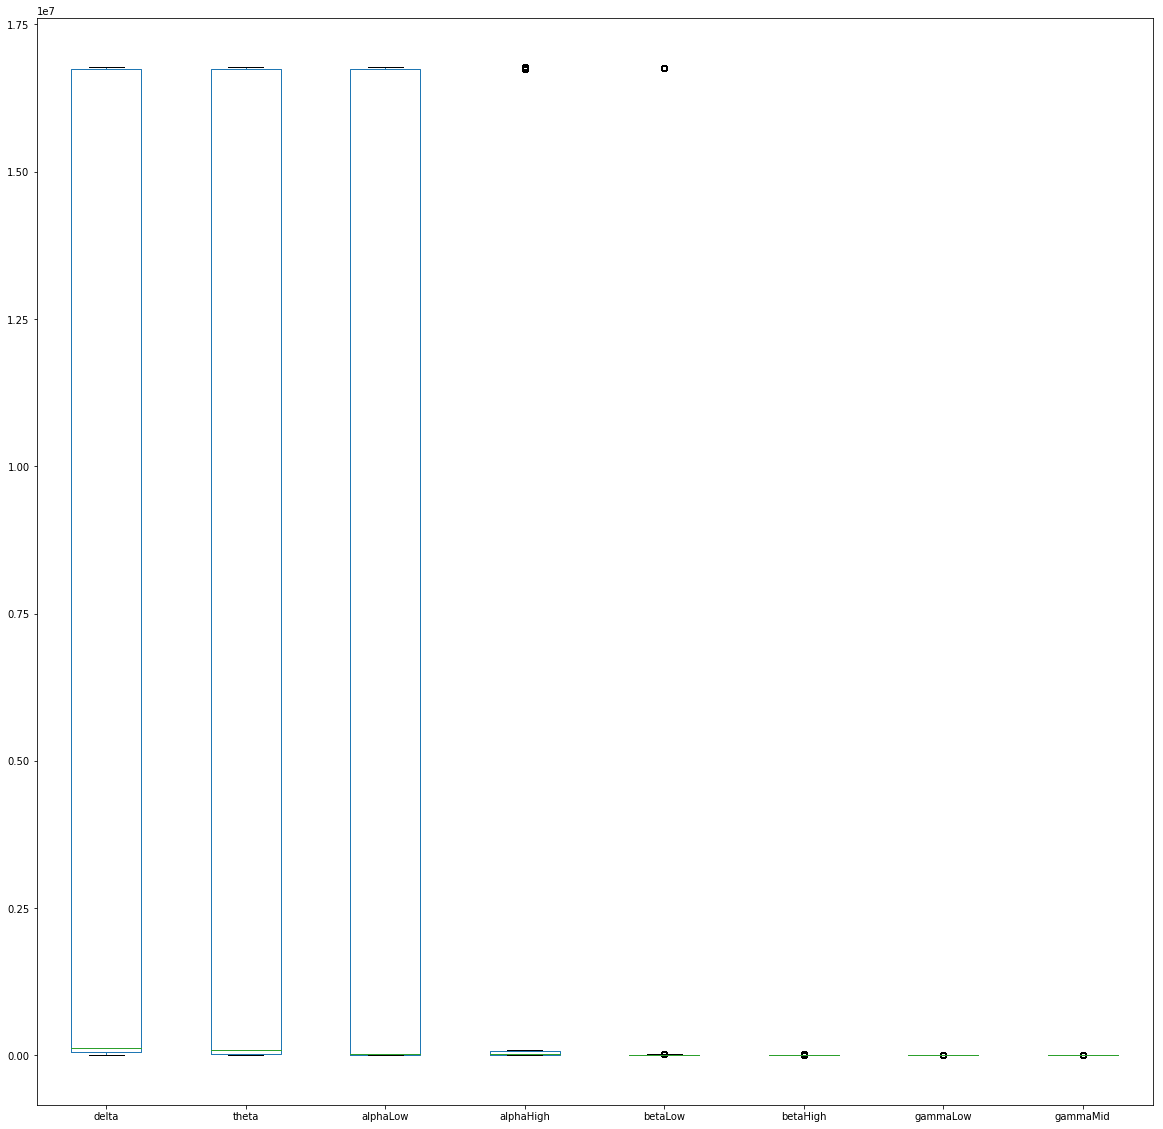

In [103]:
box = rest_waves.boxplot(grid=False, figsize=(20, 20))

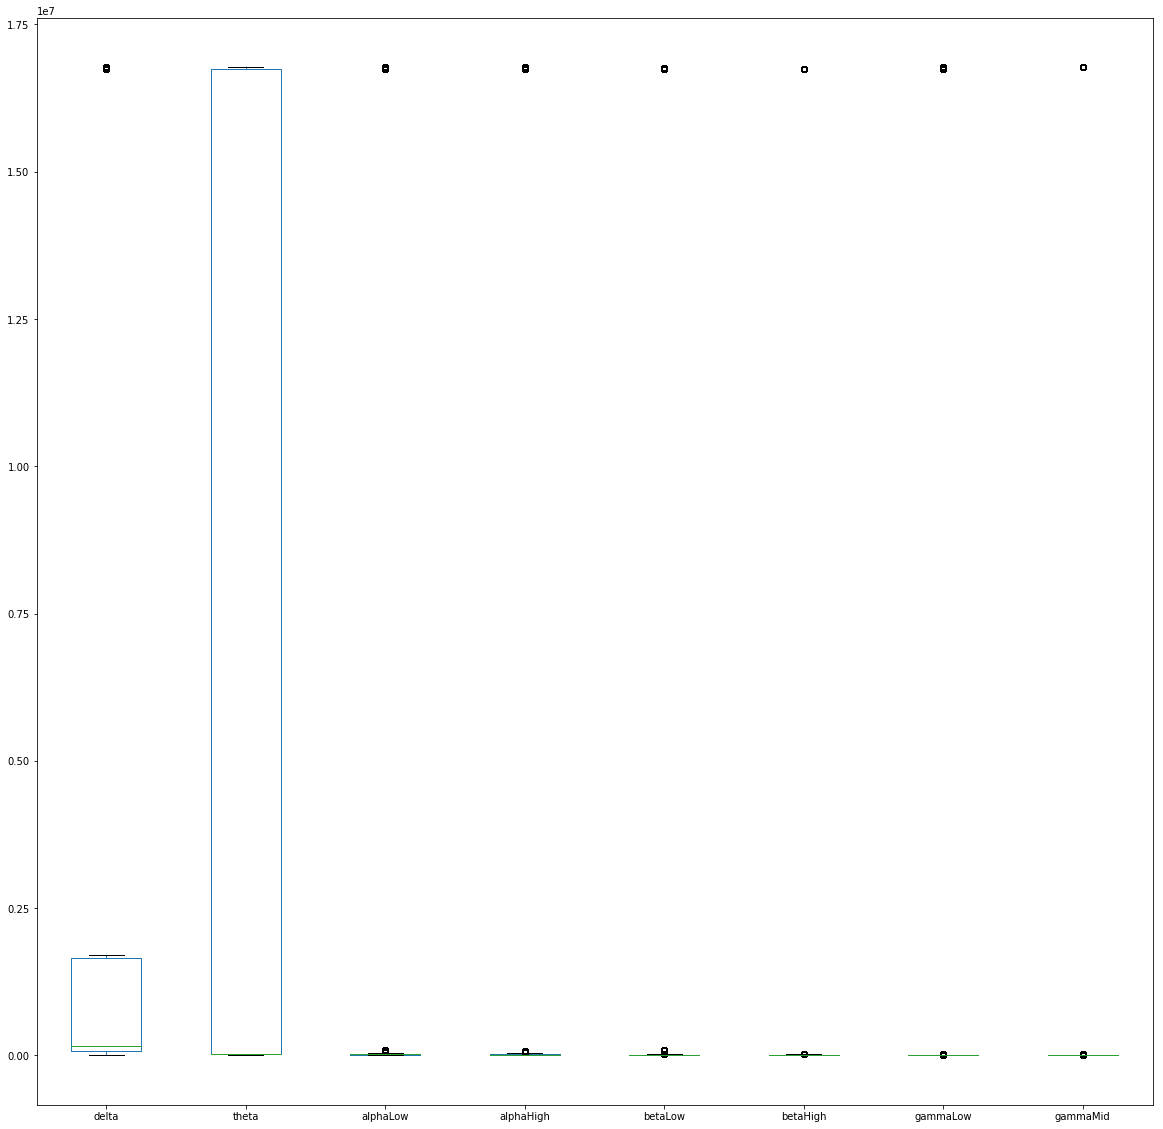

In [52]:
box = math_waves.boxplot(grid=False, figsize=(20, 20))

### Scatterplots

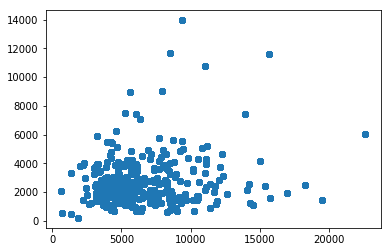

In [104]:

pdscatter = plt.scatter(rest_waves.betaHigh, rest_waves.gammaLow)

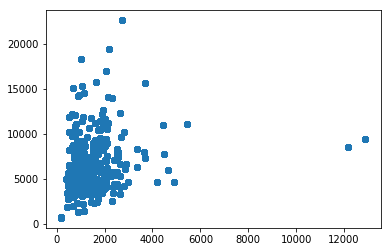

In [107]:
pdscatter = plt.scatter(rest_waves.gammaMid, rest_waves.betaHigh)

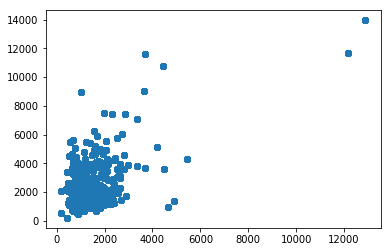

In [105]:
pdscatter = plt.scatter(rest_waves.gammaMid, rest_waves.gammaLow)

In [ ]:
re = pd.DataFrame([rest.delta, rest.theta, rest.alphaLow, 
     rest.alphaHigh, rest.betaLow, rest.betaHigh, 
     rest.gammaLow, rest.gammaMid])

re.plot.box(vert=False)

KeyboardInterrupt: 

# ML Algorithms

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.python.estimator import keras

df = pd.concat([maths, rest])

# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(df))])
for i in range(len(df)):
    data[i] = [df.delta.values[i],
               df.theta.values[i],
               df.alphaLow.values[i],
               df.alphaHigh.values[i],
               df.betaLow.values[i],
               df.betaHigh.values[i],
               df.gammaLow.values[i],
               df.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
labels = encoder.fit_transform(df.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels)

X_std = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
X_scaled = X_std * (np.max(x_train) - np.min(x_train)) + np.min(x_train)
x_train = x_train.astype('float32') / X_scaled

X_std_test = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0))
X_scaled_test = X_std_test * (np.max(x_test) - np.min(x_test)) + np.min(x_test)
x_test = x_test.astype('float32') / X_scaled_test

# # # standardisation works best for Random Forest
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std



In [ ]:
np.max(x_train)

In [ ]:
np.min(x_test)

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

from keras.optimizers import Adam

network = models.Sequential()
# network.add(layers.Dense(32, input_shape=(8,)))
# network.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
# network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dropout(0.2))
# network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dropout(0.2))
# network.add(layers.Dense(64, activation="relu"))
# network.add(layers.Dropout(0.2))
# network.add(layers.Dense(32, activation="relu"))
# network.add(layers.Dense(1, activation='sigmoid'))

network.add(layers.Dense(8, input_shape=(8,), activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(x_train, y_train, validation_split=0.33,
                      epochs=10, verbose=1, batch_size=5)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(x_test))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Random Forest - regularization is best

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# # standardisation works best for Random Forest
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(rfc.feature_importances_)

print(rfc.predict(x_test))

In [ ]:
print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
print("The prediction for the test set is ", y_pred)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
import pandas as pd
feature_imp = pd.Series(rfc.feature_importances_).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features from Random Forest")
plt.legend()
plt.show()

In [ ]:
network = models.Sequential()
network.add(layers.Dense(64, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

history = network.fit(x_train, y_train,
                      epochs=10, verbose=1)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(x_test))

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
network = models.Sequential()
network.add(layers.Dense(32, input_shape=(8,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

history = network.fit(x_train, y_train,
                      epochs=10, verbose=1)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(x_test))

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Read in new files and concat

In [14]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing


math1 = pd.read_csv("../../data_files/case_studies_data/maths-5-minutes.csv")
math2 = pd.read_csv("../../data_files/case_studies_data/maths_riddle_1.csv")
math3 = pd.read_csv("../../data_files/case_studies_data/maths_riddle_2.csv")
math_val = pd.read_csv("../../data_files/case_studies_data/maths_riddle_3.csv")
math_test = pd.read_csv("../../data_files/case_studies_data/maths_riddle_4.csv")

rest1 = pd.read_csv("../../data_files/case_studies_data/rest-5-minutes.csv")
rest2 = pd.read_csv("../../data_files/case_studies_data/rest_5_all_minutes.csv")
rest3 = pd.read_csv("../../data_files/case_studies_data/rest_5_minutes_2.csv")
rest_val = pd.read_csv("../../data_files/case_studies_data/rest_5_minutes_3.csv")
rest_test = pd.read_csv("../../data_files/case_studies_data/rest_5_minutes_4.csv")

rest = pd.concat([rest1, rest2, rest3])
math = pd.concat([math1, math2, math3])

train = pd.concat([rest, math])
val = pd.concat([rest_val, math_val])
test = pd.concat([rest_test, math_test])

math_all = pd.concat([math, math_val, math_test])
rest_all = pd.concat([rest, rest_val, rest_test])

all_data = pd.concat([math_all, rest_all])

In [3]:
math_all.describe()

,timestampMs,poorSignal,eegRawValue,eegRawValueVolts,attention,meditation,blinkStrength,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid
count,7.364800e+04,73648.000000,73648.000000,73648.000000,73648.000000,73648.000000,73648.000000,7.364800e+04,7.364800e+04,7.364800e+04,7.364800e+04,7.364800e+04,7.364800e+04,7.364800e+04,7.364800e+04
mean,1.548827e+12,0.003055,-5.147485,-0.000001,48.837076,57.915761,46.403623,4.009217e+06,4.884902e+06,2.366365e+06,1.454464e+06,3.441292e+05,3.023929e+05,2.475167e+05,4.658580e+05
std,6.451363e+07,0.276349,133.968287,0.000029,14.832750,17.536408,7.965719,6.984045e+06,7.576630e+06,5.815710e+06,4.697322e+06,2.342300e+06,2.201875e+06,2.006530e+06,2.749523e+06
min,1.548800e+12,0.000000,-2048.000000,-0.000450,3.000000,1.000000,33.000000,1.336000e+03,1.045000e+03,2.030000e+02,1.440000e+02,2.160000e+02,3.780000e+02,1.490000e+02,8.500000e+01
25%,1.548800e+12,0.000000,8.000000,0.000002,40.000000,48.000000,40.000000,6.727700e+04,1.897300e+04,6.603000e+03,5.480000e+03,4.607000e+03,3.709000e+03,1.375000e+03,9.390000e+02
50%,1.548800e+12,0.000000,38.000000,0.000008,50.000000,57.000000,45.000000,1.589450e+05,3.208900e+04,1.501100e+04,1.018200e+04,8.377000e+03,6.309000e+03,2.663000e+03,1.761000e+03
75%,1.548800e+12,0.000000,64.000000,0.000014,60.000000,69.000000,52.000000,1.012090e+06,1.674688e+07,2.578700e+04,1.984300e+04,1.299700e+04,1.000800e+04,4.429000e+03,2.972000e+03
max,1.548980e+12,25.000000,1069.000000,0.000235,91.000000,100.000000,90.000000,1.677704e+07,1.677700e+07,1.677721e+07,1.677683e+07,1.677640e+07,1.677645e+07,1.677721e+07,1.677721e+07


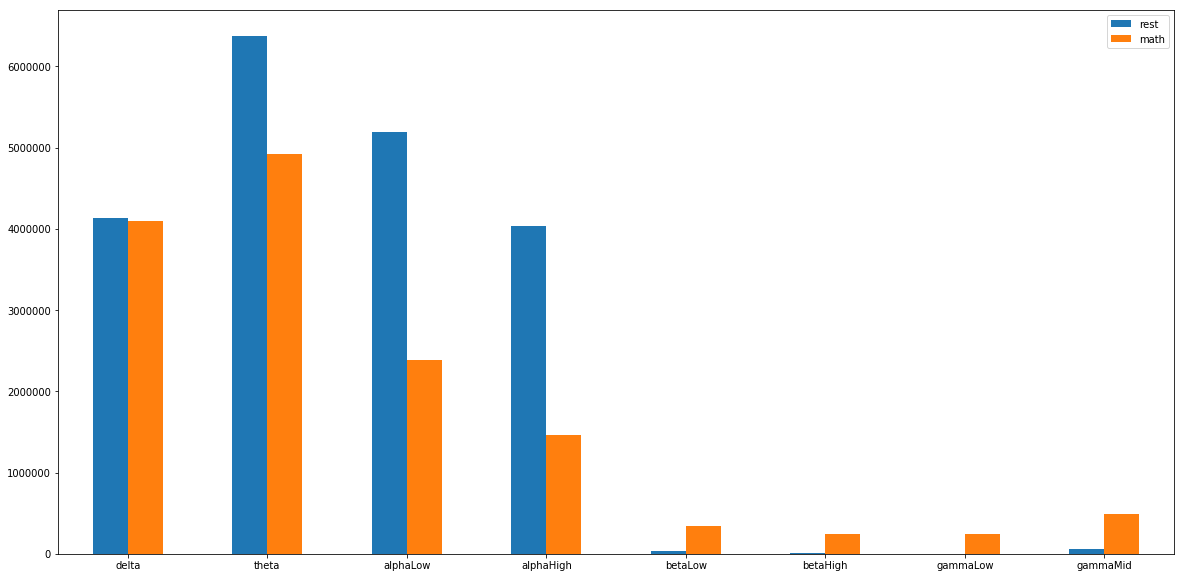

In [4]:
r = [rest.delta.mean(), rest.theta.mean(), rest.alphaLow.mean(), 
     rest.alphaHigh.mean(), rest.betaLow.mean(), rest.betaHigh.mean(), 
     rest.gammaLow.mean(), rest.gammaMid.mean()]

m = [math.delta.mean(), math.theta.mean(), math.alphaLow.mean(), 
     math.alphaHigh.mean(), math.betaLow.mean(), math.betaHigh.mean(), 
     math.gammaLow.mean(), math.gammaMid.mean()]

index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

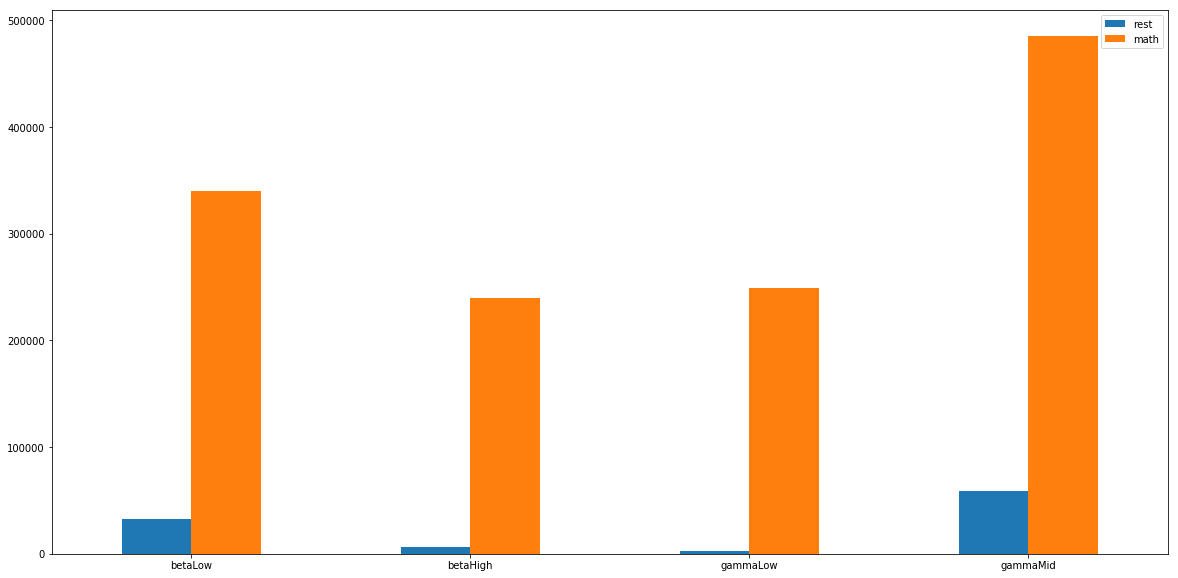

In [5]:
r = [rest.betaLow.mean(), rest.betaHigh.mean(), 
     rest.gammaLow.mean(), rest.gammaMid.mean()]

m = [math.betaLow.mean(), math.betaHigh.mean(), 
     math.gammaLow.mean(), math.gammaMid.mean()]

index = ['betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [6]:
# create an array of shape 30706, 9 = number of records by the features
train_data = np.array([[0 for x in range(9)] for y in range(len(train))])
for i in range(len(train)):
    train_data[i] = [train.eegRawValue.values[i],
                       train.delta.values[i],
                       train.theta.values[i],
                       train.alphaLow.values[i],
                       train.alphaHigh.values[i],
                       train.betaLow.values[i],
                       train.betaHigh.values[i],
                       train.gammaLow.values[i],
                       train.gammaMid.values[i]]
    
# create an array of shape 30706, 9 = number of records by the features
val_data = np.array([[0 for x in range(9)] for y in range(len(val))])
for i in range(len(val)):
    val_data[i] = [val.eegRawValue.values[i],
                       val.delta.values[i],
                       val.theta.values[i],
                       val.alphaLow.values[i],
                       val.alphaHigh.values[i],
                       val.betaLow.values[i],
                       val.betaHigh.values[i],
                       val.gammaLow.values[i],
                       val.gammaMid.values[i]]
    
# create an array of shape 30706, 9 = number of records by the features
test_data = np.array([[0 for x in range(9)] for y in range(len(test))])
for i in range(len(test)):
    test_data[i] = [test.eegRawValue.values[i],
                       test.delta.values[i],
                       test.theta.values[i],
                       test.alphaLow.values[i],
                       test.alphaHigh.values[i],
                       test.betaLow.values[i],
                       test.betaHigh.values[i],
                       test.gammaLow.values[i],
                       test.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
train_labels = encoder.fit_transform(train.action.values)
test_labels = encoder.fit_transform(test.action.values)
val_labels = encoder.fit_transform(val.action.values)
valid_set = (val_data, val_labels)

# creating training and test sets
X_std = (train_data - train_data.min(axis=0)) / (train_data.max(axis=0) - train_data.min(axis=0))
X_scaled = X_std * (np.max(train_data) - np.min(train_data)) + np.min(train_data)
train_data = train_data.astype('float32') / X_scaled

X_std_test = (test_data - test_data.min(axis=0)) / (test_data.max(axis=0) - test_data.min(axis=0))
X_scaled_test = X_std_test * (np.max(test_data) - np.min(test_data)) + np.min(test_data)
test_data = test_data.astype('float32') / X_scaled_test

X_std_val = (val_data - val_data.min(axis=0)) / (val_data.max(axis=0) - val_data.min(axis=0))
X_scaled_val = X_std_val * (np.max(val_data) - np.min(val_data)) + np.min(val_data)
val_data = val_data.astype('float32') / X_scaled_val


# # # standardisation works best for Random Forest
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# mean = x_train.mean(axis=0)
# x_train -= mean
# std = x_train.std(axis=0)
# x_train /= std
# x_test -= mean
# x_test /= std


from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

# train_data = scaler.fit_transform(train_data)
# test_data = scaler.fit_transform(test_data)
# val_data = scaler.fit_transform(val_data)

In [7]:
test_data

array([[ 2.75006578e-06,  1.03540512e+00,  1.07597982e+00, ...,
         1.62847959e+00, -3.01234360e+00, -6.00946282e-01],
       [ 4.38820589e-06,  1.03540512e+00,  1.07597982e+00, ...,
         1.62847959e+00, -3.01234360e+00, -6.00946282e-01],
       [ 5.55985248e-06,  1.03540512e+00,  1.07597982e+00, ...,
         1.62847959e+00, -3.01234360e+00, -6.00946282e-01],
       ...,
       [ 3.98702922e-06,  9.99957995e-01,  9.99873143e-01, ...,
         1.14394548e+00,  1.09228779e+00,  1.21386817e+00],
       [ 5.94012315e-06,  9.99957995e-01,  9.99873143e-01, ...,
         1.14394548e+00,  1.09228779e+00,  1.21386817e+00],
       [ 3.43113727e-07,  9.99957995e-01,  9.99873143e-01, ...,
         1.14394548e+00,  1.09228779e+00,  1.21386817e+00]])

# loss and metrics [1.0906096650109982, 0.827502597852442]

In [8]:
from keras import models
from keras import layers
from keras import regularizers

from keras.optimizers import Adam

network = models.Sequential()

network.add(layers.Dense(32, input_shape=(9,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(train_data, train_labels, validation_data=valid_set,
                      epochs=10, verbose=1, batch_size=5)

loss_and_metrics = network.evaluate(test_data, test_labels)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: 

In [ ]:


network = models.Sequential()

network.add(layers.Dense(16, input_shape=(9,)))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(train_data, train_labels, validation_data=valid_set,
                      epochs=10, verbose=1, batch_size=5)

loss_and_metrics = network.evaluate(test_data, test_labels)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:


network = models.Sequential()

network.add(layers.Dense(16, input_shape=(9,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

network.summary()

history = network.fit(train_data, train_labels, validation_data=valid_set,
                      epochs=10, verbose=1, batch_size=5)

loss_and_metrics = network.evaluate(test_data, test_labels)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(test_data))

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Random Forest

In [ ]:

# data for random forest
rfc_rest = pd.concat([rest1, rest2, rest3, rest_val])
rfc_math = pd.concat([math1, math2, math3, math_val])

rfc_data = pd.concat([rfc_rest, rfc_math])

rfc_train = pd.concat([rfc_rest, rfc_math])
rfc_test = pd.concat([rest_test, math_test])


# create an array of shape 30706, 9 = number of records by the features
rfc_train_data = np.array([[0 for x in range(9)] for y in range(len(rfc_train))])
for i in range(len(rfc_train)):
    rfc_train_data[i] = [rfc_train.eegRawValue.values[i],
                       rfc_train.delta.values[i],
                       rfc_train.theta.values[i],
                       rfc_train.alphaLow.values[i],
                       rfc_train.alphaHigh.values[i],
                       rfc_train.betaLow.values[i],
                       rfc_train.betaHigh.values[i],
                       rfc_train.gammaLow.values[i],
                       rfc_train.gammaMid.values[i]]
    
# create an array of shape 30706, 9 = number of records by the features
rfc_test_data = np.array([[0 for x in range(9)] for y in range(len(rfc_test))])
for i in range(len(rfc_test)):
    rfc_test_data[i] = [rfc_test.eegRawValue.values[i],
                       rfc_test.delta.values[i],
                       rfc_test.theta.values[i],
                       rfc_test.alphaLow.values[i],
                       rfc_test.alphaHigh.values[i],
                       rfc_test.betaLow.values[i],
                       rfc_test.betaHigh.values[i],
                       rfc_test.gammaLow.values[i],
                       rfc_test.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
rfc_train_labels = encoder.fit_transform(rfc_train.action.values)
rfc_test_labels = encoder.fit_transform(rfc_test.action.values)

# standardisation works best for Random Forest
rfc_train_data = rfc_train_data.astype('float32')
rfc_test_data = rfc_test_data.astype('float32')
mean = rfc_train_data.mean(axis=0)
rfc_train_data -= mean
std = rfc_train_data.std(axis=0)
rfc_train_data /= std
rfc_test_data -= mean
rfc_test_data /= std

# rfc_train_data = stan_scaler.fit_transform(rfc_train_data)
# rfc_test_data = stan_scaler.fit_transform(rfc_test_data)

In [ ]:
# create an array of shape 30706, 9 = number of records by the features
rfc_data_all = np.array([[0 for x in range(9)] for y in range(len(rfc_data))])
for i in range(len(rfc_data)):
    rfc_data_all[i] = [rfc_data.eegRawValue.values[i],
                       rfc_data.delta.values[i],
                       rfc_data.theta.values[i],
                       rfc_data.alphaLow.values[i],
                       rfc_data.alphaHigh.values[i],
                       rfc_data.betaLow.values[i],
                       rfc_data.betaHigh.values[i],
                       rfc_data.gammaLow.values[i],
                       rfc_data.gammaMid.values[i]]

rfc_all_labels = encoder.fit_transform(rfc_data.action.values)    
    

from sklearn.model_selection import KFold # import KFold
X = rfc_data_all
y = rfc_all_labels
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(rfc_train_data, rfc_train_labels)

print(rfc.feature_importances_)

print(rfc.predict(rfc_test_data))

print("The score for Random Forest ", rfc.score(rfc_test_data, rfc_test_labels))
y_pred = rfc.predict(rfc_test_data)
print("The prediction for the test set is ", y_pred)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(rfc_train_labels))
print("Accuracy for x_test:", metrics.accuracy_score(rfc_test_labels, y_pred))
scores = cross_val_score(rfc, rfc_data_all, rfc_all_labels, cv=5)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(rfc_train_data)
cross_val_score(rfc, rfc_data_all, rfc_all_labels, cv=custom_cv)
     

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = rfc_data_all.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(rfc, rfc_data_all, rfc_all_labels, cv=cv)  

In [ ]:
# XGBoost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(rfc_train_data, rfc_train_labels)
print(xgb)
print("The score for XGBoost ", xgb.score(rfc_test_data, rfc_test_labels))
y_pred = xgb.predict(rfc_test_data)
print("The prediction for the test set is ", y_pred)

print("Accuracy for x_test:", metrics.accuracy_score(rfc_test_labels, y_pred))


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(rfc_test_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(xgb, rfc_data_all, rfc_all_labels, cv=5)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(rfc_train_data)
cross_val_score(xgb, rfc_data_all, rfc_all_labels, cv=custom_cv)

In [ ]:
n_samples = rfc_data_all.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(xgb, rfc_data_all, rfc_all_labels, cv=cv) 

# SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
scores = cross_val_score(clf, rfc_data_all, rfc_all_labels, cv=5)
scores    
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
# from sklearn.externals import joblib

# joblib_file = "./models/rfc_2_8vals_study_binary_model.pkl"
# joblib.dump(xgb, joblib_file, protocol=2)

In [ ]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Random Forrest
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)

    print(rfc.feature_importances_)

    print(rfc.predict(X_test))

    print("The score for Random Forest ", rfc.score(X_test, y_test))
    y_pred = rfc.predict(X_test)
    print("The prediction for the test set is ", y_pred)
    #Import scikit-learn metrics module for accuracy calculation

    # Model Accuracy, how often is the classifier correct?
    print(len(y_train))
    print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))
    

In [ ]:
sitting = pd.read_csv("../data_collector/pikachu.csv")

In [ ]:
# create an array of shape 30706, 9 = number of records by the features
computer_data = np.array([[0 for x in range(9)] for y in range(len(sitting))])
for i in range(len(sitting)):
    computer_data[i] = [sitting.eegRawValue.values[i],
                       sitting.delta.values[i],
                       sitting.theta.values[i],
                       sitting.alphaLow.values[i],
                       sitting.alphaHigh.values[i],
                       sitting.betaLow.values[i],
                       sitting.betaHigh.values[i],
                       sitting.gammaLow.values[i],
                       sitting.gammaMid.values[i]]
    
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
    
computer_labels = encoder.fit_transform(sitting.action.values) 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()
computer_data = stan_scaler.fit_transform(computer_data)

In [ ]:

print("The score for Random Forest ", rfc.score(computer_data, computer_labels))
y_pred = rfc.predict(computer_data)
print("The prediction for the test set is ", y_pred)
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print(len(computer_labels))
print("Accuracy for x_test:", metrics.accuracy_score(computer_labels, y_pred))

In [4]:

rest = rest_all
maths = math_all


r = [rest.delta.mean(), rest.theta.mean(), rest.alphaLow.mean(), 
     rest.alphaHigh.mean(), rest.betaLow.mean(), rest.betaHigh.mean(), 
     rest.gammaLow.mean(), rest.gammaMid.mean()]

m = [maths.delta.mean(), maths.theta.mean(), maths.alphaLow.mean(), 
     maths.alphaHigh.mean(), maths.betaLow.mean(), maths.betaHigh.mean(), 
     maths.gammaLow.mean(), maths.gammaMid.mean()]

# s = [sitting.delta.mean(), sitting.theta.mean(), sitting.alphaLow.mean(), 
#      sitting.alphaHigh.mean(), sitting.betaLow.mean(), sitting.betaHigh.mean(), 
#      sitting.gammaLow.mean(), sitting.gammaMid.mean()]


index = ['delta', 'theta', 'alphaLow','alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid']

# df = pd.DataFrame({'rest': r,'math': m, 'sitting': s}, index=index)
# ax = df.plot.bar(rot=0, figsize=(20,10))

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [ ]:

r = [rest.delta.mean(), rest.theta.mean(), 
     (rest.alphaLow.mean() + rest.alphaHigh.mean()), (rest.betaLow.mean() + rest.betaHigh.mean()), 
     (rest.gammaLow.mean() + rest.gammaMid.mean())]

m = [maths.delta.mean(), maths.theta.mean(), (maths.alphaLow.mean() +
     maths.alphaHigh.mean()), (maths.betaLow.mean() + maths.betaHigh.mean()), 
     (maths.gammaLow.mean() + maths.gammaMid.mean())]

# s = [sitting.delta.mean(), sitting.theta.mean(), sitting.alphaLow.mean(), 
#      sitting.alphaHigh.mean(), sitting.betaLow.mean(), sitting.betaHigh.mean(), 
#      sitting.gammaLow.mean(), sitting.gammaMid.mean()]


index = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# df = pd.DataFrame({'rest': r,'math': m, 'sitting': s}, index=index)
# ax = df.plot.bar(rot=0, figsize=(20,10))

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [ ]:
r = [rest.delta.mean(), rest.theta.mean(), 
     (rest.alphaLow.mean() + rest.alphaHigh.mean()), (rest.betaLow.mean() + rest.betaHigh.mean()), 
     (rest.gammaLow.mean() + rest.gammaMid.mean())]

m = [maths.delta.mean(), maths.theta.mean(), (maths.alphaLow.mean() +
     maths.alphaHigh.mean()), (maths.betaLow.mean() + maths.betaHigh.mean()), 
     (maths.gammaLow.mean() + maths.gammaMid.mean())]

# s = [sitting.delta.mean(), sitting.theta.mean(), sitting.alphaLow.mean(), 
#      sitting.alphaHigh.mean(), sitting.betaLow.mean(), sitting.betaHigh.mean(), 
#      sitting.gammaLow.mean(), sitting.gammaMid.mean()]


index = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# df = pd.DataFrame({'rest': r,'math': m, 'sitting': s}, index=index)
# ax = df.plot.bar(rot=0, figsize=(20,10))

df = pd.DataFrame({'rest': r,'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

In [5]:
# create an array of shape 30706, 9 = number of records by the features
maths_data = np.array([[0 for x in range(8)] for y in range(len(maths))])
for i in range(len(maths)):
    maths_data[i] = [train.delta.values[i],
                       maths.theta.values[i],
                       maths.alphaLow.values[i],
                       maths.alphaHigh.values[i],
                       maths.betaLow.values[i],
                       maths.betaHigh.values[i],
                       maths.gammaLow.values[i],
                       maths.gammaMid.values[i]]
    
# create an array of shape 30706, 9 = number of records by the features
rest_data = np.array([[0 for x in range(8)] for y in range(len(rest))])
for i in range(len(rest)):
    rest_data[i] = [rest.delta.values[i],
                       rest.theta.values[i],
                       rest.alphaLow.values[i],
                       rest.alphaHigh.values[i],
                       rest.betaLow.values[i],
                       rest.betaHigh.values[i],
                       rest.gammaLow.values[i],
                       rest.gammaMid.values[i]]
    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stan_scaler = StandardScaler()

maths_data = scaler.fit_transform(maths_data)
rest_data = scaler.fit_transform(rest_data)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
maths_df = pd.DataFrame(data=maths_data, 
    columns=['delta', 'theta', 'alphaLow', 'alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid'])

rest_df = pd.DataFrame(data=rest_data, 
    columns=['delta', 'theta', 'alphaLow', 'alphaHigh', 'betaLow', 'betaHigh', 'gammaLow', 'gammaMid'])

NameError: name 'plt' is not defined

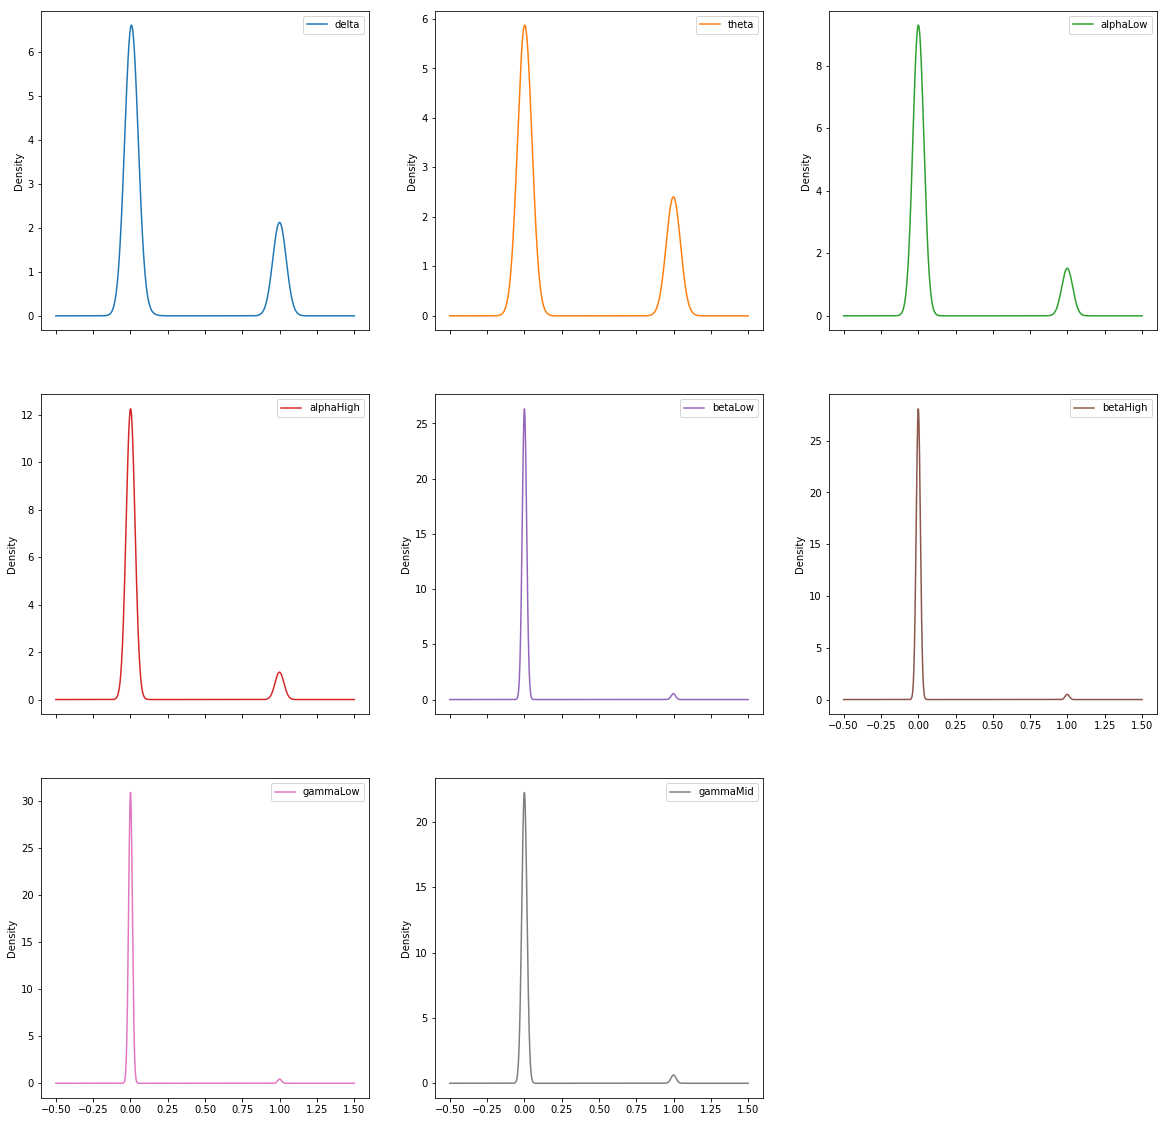

In [7]:
maths_df.plot(kind='density', subplots=True, figsize=(20,20), layout=(3, 3)) 
plt.show()

In [ ]:
meth = math_all.drop(['eegRawValue', 
                'timestampMs',
                'poorSignal',
               'eegRawValueVolts',
               'attention',
               'meditation',
               'blinkStrength'], axis=1)
meth.plot(kind='density', subplots=True, figsize=(20,20), layout=(3, 3), sharex=True, use_index=True) 
plt.show()

In [ ]:
maths_df.hist(figsize=(20,20), sharex=False)

In [ ]:
rest_df.plot(kind='density', subplots=True, figsize=(20,20), layout=(3, 3)) 
plt.show()

In [ ]:
rest_df.hist(figsize=(20,20))

In [ ]:
m = [maths_df.delta.mean(), maths_df.theta.mean(), (maths_df.alphaLow.mean() +
     maths_df.alphaHigh.mean()), (maths_df.betaLow.mean() + maths_df.betaHigh.mean()), 
     (maths_df.gammaLow.mean() + maths_df.gammaMid.mean())]

# s = [sitting.delta.mean(), sitting.theta.mean(), sitting.alphaLow.mean(), 
#      sitting.alphaHigh.mean(), sitting.betaLow.mean(), sitting.betaHigh.mean(), 
#      sitting.gammaLow.mean(), sitting.gammaMid.mean()]


index = ['delta', 'theta', 'alpha', 'beta', 'gamma']

# df = pd.DataFrame({'rest': r,'math': m, 'sitting': s}, index=index)
# ax = df.plot.bar(rot=0, figsize=(20,10))

df = pd.DataFrame({'math': m}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))

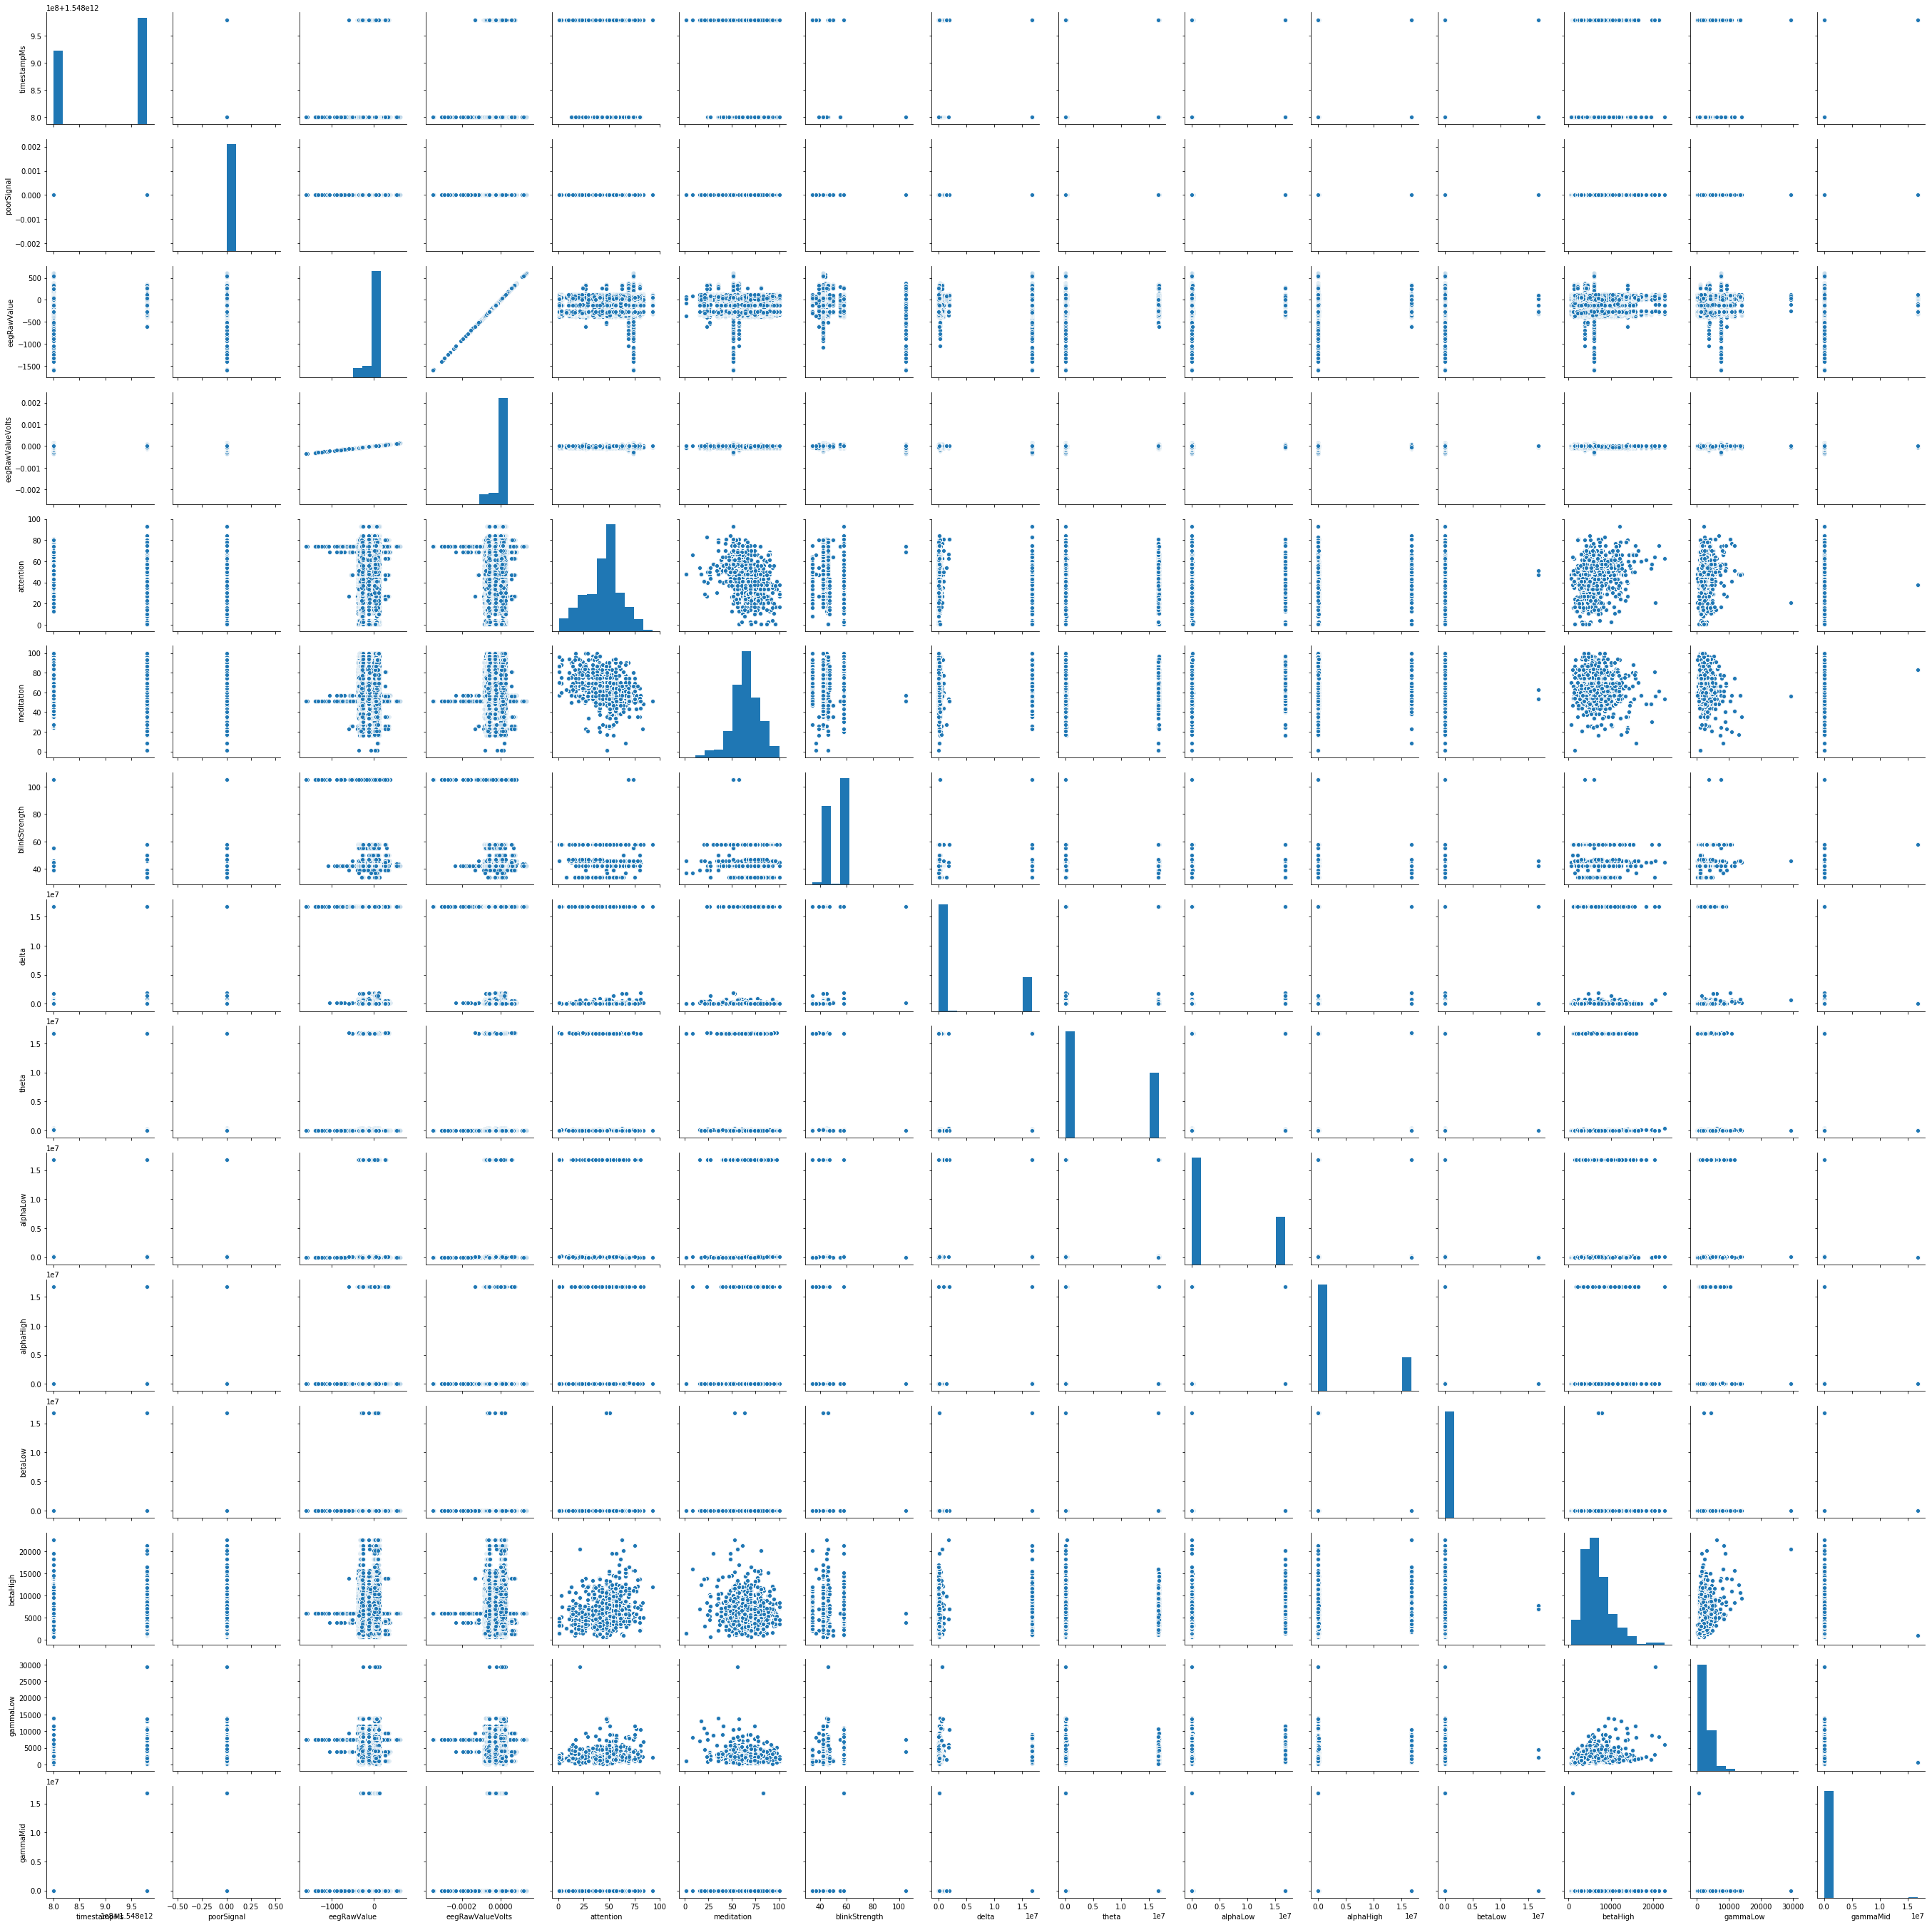

In [18]:
import seaborn as sb

sb.pairplot(rest_all, palette='hls')